# Imports

In [427]:
# تحميل المكتبات اللازمة
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
import joblib
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance
import lime
import lime.lime_tabular
import shap
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.feature_selection import chi2,f_classif
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer
import keras
from sklearn.ensemble import VotingRegressor

In [652]:
linear_model='model/linear_model.keras'
MLP_model='model/MLP_model.keras'
Ridge_model='model/Ridge_model.keras'
Lasso_model='model/Lasso_model.keras'
KNN_model='model/KNN_model.keras'
SVR_model='model/SVR_model.keras'
RandomForest_model='model/RandomForest_model.keras'
DecisionTree_model='model/DecisionTree_model.keras'
best_model_ever = 'model/best_model_ever.keras'

In [3]:
# !pip install lime shap

# تنبؤ العقارات (تنبؤ OutcomeVariable)

# المعلومات العامة

- OutcomeVariable: المقياس الأساسي الذي نهدف إلى التنبؤ به أو تحليله لكل عنصر في مجموعة البيانات.
- BuildingCategory: رمز رقمي يصنف النوع الهيكلي العام للعنصر.
- ZoningClassification: فئة الاستخدام المحددة للمنطقة التي يقع فيها العنصر.
- StreetLineLength: طول واجهة العنصر على الشارع بوحدات خطية.
- ParcelSize: المساحة الإجمالية للأرض المرتبطة بالعنصر، مقاسة بوحدات مربعة.
- RoadAccessType: نوع الطريق الذي يوفر الوصول إلى موقع العنصر.
- AlleyAccessType: نوع الوصول إلى الزقاق المتاح لموقع العنصر (إن وجد).
- ParcelShape: الشكل الهندسي العام لقطعة الأرض.
- TerrainFlatness: وصف لمستوى الأرض أو انحدارها.
- UtilityAvailability: أنواع خدمات المرافق المتاحة في موقع العنصر.
- ParcelSettings: تكوينات أو ميزات محددة لقطعة الأرض.
- TerrainSlope: درجة ميل الأرض.
- District: المناطق الجغرافية الفرعية أو المناطق داخل منطقة أكبر.
- RoadProximity1: يشير إلى قرب العنصر من طريق رئيسي أو مسار نقل.
- RoadProximity2: يشير إلى قرب العنصر من طريق رئيسي ثانٍ أو مسار، إن وجد.

# خصائص العنصر

- DwellingType: التصنيف المعماري المحدد للهيكل.
- DwellingStyle: النمط المعماري للهيكل.
- MaterialQuality: تصنيف الجودة العامة للمواد المستخدمة في بناء العنصر.
- ConditionRating: تقييم عام لحالة العنصر الحالية من حيث الصيانة والإصلاح.
- ConstructionYear: السنة التي بُني فيها العنصر أصلاً.
- RenovationYear: السنة التي شهد فيها العنصر تجديدًا كبيرًا أو إضافة.
- RoofType: نمط أو تصميم السقف.
- RoofMaterial: المادة الأساسية المستخدمة في بناء السقف.
- ExteriorCladding1: المادة الرئيسية التي تغطي الجزء الخارجي للعنصر.
- ExteriorCladding2: مادة تغطية خارجية ثانوية، إن وجدت.
- MasonryType: نوع العمل الزخرفي بالطوب المستخدم في الجزء الخارجي للعنصر.
- MasonrySize: المساحة المغطاة بالطوب، مقاسة بوحدات مربعة.
- ExteriorQuality: جودة المواد المستخدمة في تغطية الجزء الخارجي.
- ExteriorCondition: الحالة الحالية للكسوة الخارجية.
- FoundationType: نوع الأساس الذي يدعم هيكل العنصر.

# الميزات الداخلية

- BasementHeight: تصنيف ارتفاع القبو بالنسبة لمستوى الأرض.
- BasementCondition: الحالة العامة لمساحة القبو.
- BasementAccess: يصف ما إذا كان للقبو وصول مشاة أو عند مستوى الحديقة.
- BasementFinish1: جودة التشطيب في المنطقة الرئيسية المنتهية من القبو.
- BasementFinishedArea1: مساحة المنطقة الرئيسية المنتهية في القبو، مقاسة بوحدات مربعة.
- BasementFinish2: جودة التشطيب في منطقة ثانية منتهية في القبو (إن وجدت).
- BasementFinishedArea2: مساحة منطقة ثانية منتهية في القبو، مقاسة بوحدات مربعة.
- BasementUnfinishedArea: مساحة الجزء غير المنتهي من القبو، مقاسة بوحدات مربعة.
- TotalBasementArea: المساحة الإجمالية للقبو، بما في ذلك المناطق المنتهية وغير المنتهية، مقاسة بوحدات مربعة.
- HeatingType: النظام المستخدم لتدفئة العنصر.
- HeatingQuality: جودة وحالة نظام التدفئة.
- AirConditioning: يشير إلى ما إذا كان العنصر يحتوي على تكييف مركزي.
- ElectricalSystem: نوع النظام الكهربائي المثبت.
- GroundFloorArea: مساحة الطابق الأرضي، مقاسة بوحدات مربعة.
- UpperFloorArea: مساحة الطابق العلوي(الطوابق)، مقاسة بوحدات مربعة.
- LowQualityArea: مساحة العنصر المنتهية بمعايير أقل، مقاسة بوحدات مربعة.
- LivingArea: المساحة الإجمالية للمعيشة فوق مستوى الأرض، مقاسة بوحدات مربعة.
- BasementFullBathrooms: عدد الحمامات الكاملة في القبو.
- BasementHalfBathrooms: عدد الحمامات النصفية في القبو.
- FullBathrooms: عدد الحمامات الكاملة فوق مستوى الأرض.
- HalfBathrooms: عدد الحمامات النصفية فوق مستوى الأرض.
- Bedrooms: عدد غرف النوم في العنصر.
- Kitchens: عدد المطابخ في العنصر.
- KitchenQuality: جودة تشطيبات وتركيبات المطبخ.
- TotalRooms: العدد الإجمالي للغرف فوق مستوى الأرض، باستثناء الحمامات.
- FunctionalityRating: تصنيف الوظائف العامة وتخطيط العنصر.
- FireplaceCount: عدد المواقد في العنصر.
- FireplaceQuality: جودة الموقد (المواقد).

# الميزات الإضافية

- GarageLocation: موقع المرآب بالنسبة للعنصر.
- GarageConstructionYear: السنة التي بُني فيها المرآب.
- GarageInterior: التشطيب الداخلي للمرآب.
- GarageCapacity: عدد المركبات التي يمكن أن يستوعبها المرآب.
- GarageSize: مساحة المرآب، مقاسة بوحدات مربعة.
- GarageQuality: جودة بناء المرآب.
- GarageCondition: الحالة الحالية للمرآب.
- DrivewayType: يشير إلى ما إذا كان الممر مرصوفًا.
- WoodDeckArea: مساحة سطح الخشب، مقاسة بوحدات مربعة.
- OpenPorchArea: مساحة الشرفة المفتوحة، مقاسة بوحدات مربعة.
- EnclosedPorchArea: مساحة الشرفة المغلقة، مقاسة بوحدات مربعة.
- ThreeSeasonPorchArea: مساحة الشرفة التي تستخدم لثلاثة فصول، مقاسة بوحدات مربعة.
- ScreenPorchArea: مساحة الشرفة المسورة، مقاسة بوحدات مربعة.
- PoolSize: مساحة المسبح، مقاسة بوحدات مربعة.
- PoolQuality: جودة المسبح.
- FenceQuality: جودة السور.
- AdditionalFeature: ميزة إضافية غير مغطاة في الفئات الأخرى.
- AdditionalFeatureValue: القيمة المالية للميزة الإضافية.

# معلومات البيع

- SaleMonth: الشهر الذي تم فيه بيع العنصر.
- SaleYear: السنة التي تم فيها بيع العنصر.
- SaleType: طريقة أو نوع عملية البيع.
- SaleCondition: حالة البيع.

In [348]:
data = pd.read_csv('train.csv')

# تجربة مبدئية عن طريق الشات 

In [10]:
# فصل البيانات إلى ميزات ومتغير الهدف
X = data.drop('OutcomeVariable', axis=1)
y = data['OutcomeVariable']

# تحديد الميزات العددية والكيفية
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# إنشاء المحول للميزات العددية والكيفية مع معالجة القيم الفارغة
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='None')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# إنشاء بايبلاين يتضمن المعالجة الأولية والنموذج
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# ضبط الهايبر باراميترز باستخدام GridSearchCV
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='r2')



R2 Score: 0.8842280142170962
Final pipeline steps: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Id', 'BuildingCategory', 'StreetLineLength', 'ParcelSize',
       'MaterialQuality', 'ConditionRating', 'ConstructionYear',
       'RenovationYear', 'MasonrySize', 'BasementFinishedArea1',
       'BasementFinish...
       'BasementFinish1', 'BasementFinish2', 'HeatingType', 'HeatingQuality',
       'AirConditioning', 'ElectricalSystem', 'KitchenQuality',
       'FunctionalityRating', 'FireplaceQuality', 'GarageLocation',
       'GarageInterior', 'Garag

In [ ]:
# grid_search.fit(X_train, y_train)

# # التنبؤ على مجموعة الاختبار
# y_pred = grid_search.predict(X_test)

# # حساب R-score
# r2 = r2_score(y_test, y_pred)
# print(f'R2 Score: {r2}')

# # حفظ النموذج المدرب
# joblib.dump(grid_search.best_estimator_, 'best_model.pkl')

# # وصف البايبلاين النهائي
# final_pipeline = grid_search.best_estimator_
# print(f"Final pipeline steps: {final_pipeline}")

# بداية العمل الحقيقي


# طريقة الحل 
- أولاً نحتاج أن نقوم بحل مشكلة القيم الفارغة
- ثانياً نحتاج فحص الأعمده المهمه
- ثالثاً تطبيق خوارزميات التوقع 
- رابعاً وضع النتائج في داتا فريم أعمدته كل تجربة وسبب تجريبها وهل قامت بالتحسين ام لا 
- النتيجة الأخيرة هي البايبلاين الأمثل للموديل المطبق على الداتا، وضح ما هو البايبلاين بآخر خلية بالنوتبوك

### أولاً

In [222]:
q=data.isnull().sum()
q[q!=0]

StreetLineLength           259
AlleyAccessType           1369
MasonryType                872
MasonrySize                  8
BasementHeight              37
BasementCondition           37
BasementAccess              38
BasementFinish1             37
BasementFinish2             38
ElectricalSystem             1
FireplaceQuality           690
GarageLocation              81
GarageConstructionYear      81
GarageInterior              81
GarageQuality               81
GarageCondition             81
PoolQuality               1453
FenceQuality              1179
AdditionalFeature         1406
dtype: int64

In [42]:
# data['StreetLineLength'].value_counts()

In [43]:
# data['StreetLineLength'].describe()

In [44]:
# data['AlleyAccessType'].value_counts()

In [45]:
# sns.boxplot(x='AlleyAccessType', y='OutcomeVariable', data=data)
# plt.title('تأثير نوع الزقاق على سعر المنزل')
# plt.show()

In [47]:
# data['MasonryType'].value_counts()

In [46]:
# data['MasonrySize'].value_counts()

In [19]:
# data['TotalBasementArea'].value_counts()

In [21]:
# data['BasementUnfinishedArea'].value_counts()

In [22]:
# data['BasementFinishedArea2'].value_counts()

In [23]:
# data['BasementFinish2'].value_counts()

In [24]:
# data['BasementFinishedArea1'].value_counts()

In [25]:
# data['BasementFinish1'].value_counts()

In [26]:
# data['BasementAccess'].value_counts()

In [27]:
# data['BasementCondition'].value_counts()

In [20]:
# data['BasementHeight'].value_counts()

In [12]:
# data['ElectricalSystem'].value_counts()

In [13]:
# data[data['ElectricalSystem'].isnull()]

In [14]:
# data['AdditionalFeature'].value_counts()

In [349]:
data['ElectricalSystem'].fillna('SBrkr', inplace=True)
data['AdditionalFeature'].fillna(-1, inplace=True)
data['GarageLocation'].fillna(-1, inplace=True)
data['GarageConstructionYear'].fillna(-1, inplace=True)
data['GarageInterior'].fillna(-1, inplace=True)
data['GarageCondition'].fillna(-1, inplace=True)
data['FenceQuality'].fillna(-1, inplace=True)
data['PoolQuality'].fillna(-1, inplace=True)
data['FireplaceQuality'].fillna(-1, inplace=True)
data['GarageQuality'].fillna(-1, inplace=True)

Basement = ['BasementCondition', 'BasementAccess', 'BasementFinish1', 
            'BasementFinish2','BasementHeight','TotalBasementArea',
            'BasementUnfinishedArea','BasementFinishedArea2','BasementFinishedArea1'] 
data.loc[data['BasementHeight'].isnull(),Basement] = -1
data['BasementAccess'].fillna(-1, inplace=True)
data['BasementFinish2'].fillna(-1, inplace=True)

Masonry=['MasonrySize','MasonryType']
data.loc[data['MasonrySize'].isnull(),Masonry] = -1
data.loc[data['MasonrySize']==0,Masonry] = -1

data['MasonryType'].fillna('BrkFace', inplace=True)


median_street_length_by_district = data.groupby('District')['StreetLineLength'].mean()

def fill_street_length(row):
    if pd.isnull(row['StreetLineLength']):
        return median_street_length_by_district.get(row['District'])
    return row['StreetLineLength']

data['StreetLineLength'] = data.apply(fill_street_length, axis=1)

- we will drop the TerrainFlatness column cuz 90% of it's values are Lvl --> bias
- ---------------- UtilityAvailability ------ 99% ------------------ AllPub --> bias
- ---------------- TerrainSlope ------------- 95% ------------------ Gtl --> bias
- ---------------- RoadProximity1 ----------- 86% ------------------ Norm --> bias
- ---------------- RoadProximity2 ----------- 99% ------------------ Norm --> bias 
- ---------------- DwellingType ------------- 84% ------------------ 1Fam --> bias
- ---------------- RoofType ----------------- 78% ------------------ Gable --> bias
- ---------------- RoofMaterial ------------- 98% ------------------ CompShg --> bias
- ---------------- ExteriorCondition -------- 88% ------------------ TA --> bias
- ---------------- BasementCondition -------- 90% ------------------ TA --> bias
- ---------------- BasementFinish2 ---------- 86% ------------------ Unf --> bias
- ---------------- HeatingType -------------- 98% ------------------ GasA --> bias
- ---------------- AirConditioning ---------- 93% ------------------ Y --> bias
- ---------------- ElectricalSystem --------- 91% ------------------ SBrkr --> bias
- ---------------- KitchenAbvGr ------------- 95% ------------------ 1 --> bias
- ---------------- FunctionalityRating ------ 93% ------------------ Typ --> bias
- ----------------

In [350]:
columns_to_drop=['Id','AlleyAccessType','FunctionalityRating','KitchenAbvGr',
                 'ElectricalSystem','AirConditioning','HeatingType','BasementFinish2',
                 'BasementCondition','ExteriorCondition','RoofMaterial','RoofType',
                 'DwellingType','RoadProximity2','RoadProximity1','TerrainSlope',
                 'UtilityAvailability']
data.drop(columns=columns_to_drop, inplace=True)

In [ ]:
def fill_missing_with_percetages(df,column):
    value_counts = df[column].value_counts(normalize = True)* 100
    missing_count = df[column].isna().sum()
    fill_values = np.random.choice(value_counts.inndex,size=missing_count,p=value_counts.values / 100)
    df.loc[df[column].isna(), column] = fill_values
    return df

In [225]:
b=data.describe()
b

,BuildingCategory,StreetLineLength,ParcelSize,MaterialQuality,ConditionRating,ConstructionYear,RenovationYear,MasonrySize,BasementFinishedArea1,BasementFinishedArea2,...,WoodDeckArea,OpenPorchArea,EnclosedPorchArea,ThreeSeasonPorchArea,ScreenPorchArea,PoolSize,AdditionalFeatureValue,SaleMonth,SaleYear,OutcomeVariable
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.725218,10516.828082,6.099315,5.575342,1971.267808,1984.865753,102.521918,443.614384,46.523973,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.426978,9981.264932,1.382997,1.112799,30.202904,20.645407,181.071550,456.122784,161.326667,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,-1.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.083333,9478.500000,6.000000,5.000000,1973.000000,1994.000000,-1.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [226]:
b.columns

Index(['BuildingCategory', 'StreetLineLength', 'ParcelSize', 'MaterialQuality',
       'ConditionRating', 'ConstructionYear', 'RenovationYear', 'MasonrySize',
       'BasementFinishedArea1', 'BasementFinishedArea2',
       'BasementUnfinishedArea', 'TotalBasementArea', 'GroundFloorArea',
       'UpperFloorArea', 'LowQualityArea', 'LivingArea',
       'BasementFullBathrooms', 'BasementHalfBathrooms', 'FullBathrooms',
       'HalfBathrooms', 'BedroomAbvGr', 'TotalRooms', 'FireplaceCount',
       'GarageConstructionYear', 'GarageCapacity', 'GarageSize',
       'WoodDeckArea', 'OpenPorchArea', 'EnclosedPorchArea',
       'ThreeSeasonPorchArea', 'ScreenPorchArea', 'PoolSize',
       'AdditionalFeatureValue', 'SaleMonth', 'SaleYear', 'OutcomeVariable'],
      dtype='object')

In [227]:
a=data.describe(include='object')
a

,ZoningClassification,RoadAccessType,ParcelShape,TerrainFlatness,ParcelSettings,District,DwellingStyle,ExteriorCladding1,ExteriorCladding2,MasonryType,...,GarageLocation,GarageInterior,GarageQuality,GarageCondition,DrivewayType,PoolQuality,FenceQuality,AdditionalFeature,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,4,4,5,25,8,15,16,4,...,7,4,6,6,3,4,5,5,9,6
top,RL,Pave,Reg,Lvl,Inside,NAmes,1Story,VinylSd,VinylSd,-1,...,Attchd,Unf,TA,TA,Y,-1,-1,-1,WD,Normal
freq,1151,1454,925,1311,1052,225,726,515,504,869,...,870,605,1311,1326,1340,1453,1179,1406,1267,1198


In [228]:
a.columns

Index(['ZoningClassification', 'RoadAccessType', 'ParcelShape',
       'TerrainFlatness', 'ParcelSettings', 'District', 'DwellingStyle',
       'ExteriorCladding1', 'ExteriorCladding2', 'MasonryType',
       'ExteriorQuality', 'FoundationType', 'BasementHeight', 'BasementAccess',
       'BasementFinish1', 'HeatingQuality', 'KitchenQuality',
       'FireplaceQuality', 'GarageLocation', 'GarageInterior', 'GarageQuality',
       'GarageCondition', 'DrivewayType', 'PoolQuality', 'FenceQuality',
       'AdditionalFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

### ثانياً

preprocess_data

In [428]:
def preprocess_data(data):
    X = data.drop('OutcomeVariable', axis=1)
    y = data['OutcomeVariable']

    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['object']).columns

    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])

    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

    X[categorical_features] = X[categorical_features].astype(str)

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])
    def convert_to_dataframe(X):
        return pd.DataFrame(X, columns=numeric_features.tolist() + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)))
    
    postprocessor = FunctionTransformer(convert_to_dataframe, validate=False)
    
    return preprocessor, postprocessor, X, y

preprocessor,postprocessor, X,y = preprocess_data(data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train=X
# X_test=X
# y_train=y
# y_test=y

RandomForestRegressor

In [429]:
def tree_based_importance( X_train, X_test, y_train, y_test,top_n=20):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
    ])

    pipeline.fit(X_train, y_train)

    model = pipeline.named_steps['regressor']
    importances = model.feature_importances_

    feature_names = (X_train.select_dtypes(include=['int64', 'float64']).columns.tolist() + 
                     pipeline.named_steps['preprocessor']
                     .transformers_[1][1]
                     .named_steps['onehot']
                     .get_feature_names_out(X_train.select_dtypes(include=['object']).columns).tolist())
    indices = np.argsort(importances)[::-1]
    top_features = [feature_names[i] for i in indices[:top_n]]

    # تحويل القيم لتكون مصفوفة
    shap_values = np.zeros((X_train.shape[0], len(feature_names)))
    for i in range(len(feature_names)):
        shap_values[:, i] = importances[i]

    shap.summary_plot(shap_values, features=pipeline.named_steps['preprocessor'].transform(X_train), feature_names=feature_names, plot_type="bar")

    X_train_selected = pd.DataFrame(pipeline.named_steps['preprocessor'].transform(X_train), columns=feature_names)[top_features]
    X_test_selected = pd.DataFrame(pipeline.named_steps['preprocessor'].transform(X_test), columns=feature_names)[top_features]

    return top_features, X_train_selected, X_test_selected

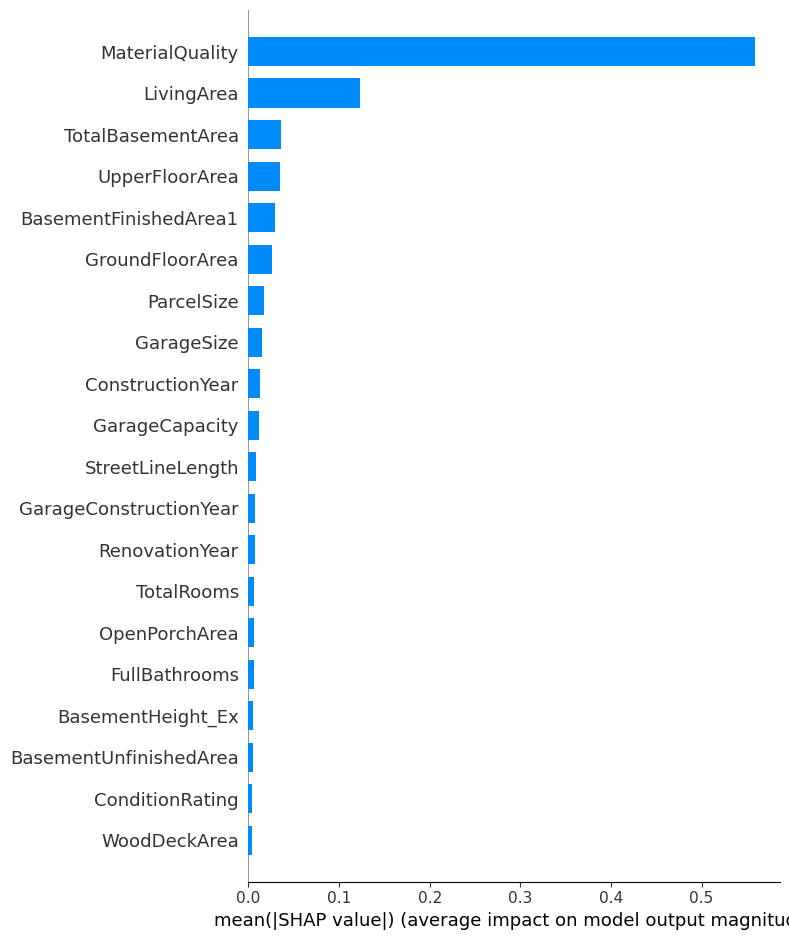

In [430]:
top_features_tree_based ,  X_train_selected_tree_based, X_test_selected_tree_based=tree_based_importance( X_train, X_test, y_train, y_test)

LinearRegression

In [431]:
def LinearRegression_importance( X_train, X_test, y_train, y_test, top_n=20):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ])

    pipeline.fit(X_train, y_train)

    model = pipeline.named_steps['regressor']
    coefficients = model.coef_

    feature_names = (X_train.select_dtypes(include=['int64', 'float64']).columns.tolist() + 
                     preprocessor.transformers_[1][1]
                     .named_steps['onehot']
                     .get_feature_names_out(X_train.select_dtypes(include=['object']).columns).tolist())
    indices = np.argsort(np.abs(coefficients))[::-1]
    top_features = [feature_names[i] for i in indices[:top_n]]

    # تحويل القيم لتكون مصفوفة
    shap_values = np.tile(coefficients, (X_train.shape[0], 1))

    shap.summary_plot(shap_values, features=pipeline.named_steps['preprocessor'].transform(X_train), feature_names=feature_names, plot_type="bar")
    X_train_selected = pd.DataFrame(pipeline.named_steps['preprocessor'].transform(X_train), columns=feature_names)[top_features]
    X_test_selected = pd.DataFrame(pipeline.named_steps['preprocessor'].transform(X_test), columns=feature_names)[top_features]

    return top_features, X_train_selected, X_test_selected

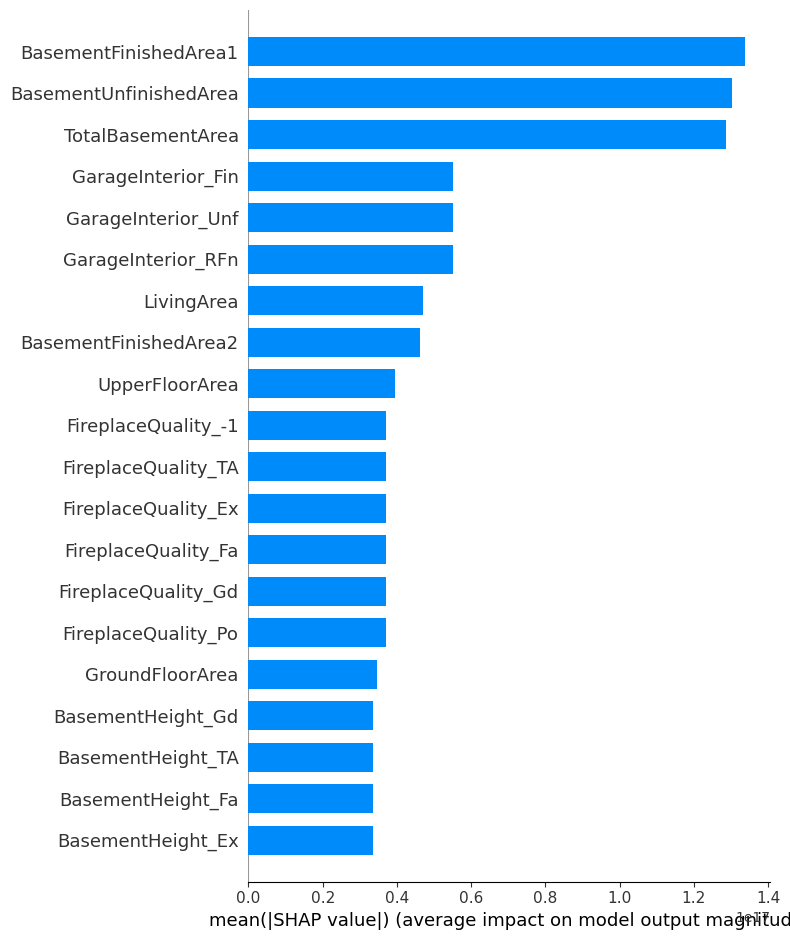

In [432]:
top_features_LinearRegression, X_train_selected_LinearRegression, X_test_selected_LinearRegression=LinearRegression_importance( X_train, X_test, y_train, y_test)

تراجع العشوائية (Permutation Importance)

In [433]:
def permutation_importance_method( X_train, X_test, y_train, y_test, top_n=20):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
    ])

    pipeline.fit(X_train, y_train)

    X_transformed = pipeline.named_steps['preprocessor'].transform(X_train)
    perm_importance = permutation_importance(pipeline.named_steps['regressor'], X_transformed, y_train, n_repeats=10, random_state=42)

    feature_names = (X_train.select_dtypes(include=['int64', 'float64']).columns.tolist() + 
                     preprocessor.transformers_[1][1]
                     .named_steps['onehot']
                     .get_feature_names_out(X_train.select_dtypes(include=['object']).columns).tolist())
    indices = np.argsort(perm_importance.importances_mean)[::-1]
    top_features = [feature_names[i] for i in indices[:top_n]]

    # تحويل القيم لتكون مصفوفة
    shap_values = np.tile(perm_importance.importances_mean, (X_train.shape[0], 1))

    shap.summary_plot(shap_values, features=X_transformed, feature_names=feature_names, plot_type="bar")
    X_train_selected = pd.DataFrame(pipeline.named_steps['preprocessor'].transform(X_train), columns=feature_names)[top_features]
    X_test_selected = pd.DataFrame(pipeline.named_steps['preprocessor'].transform(X_test), columns=feature_names)[top_features]

    return top_features, X_train_selected, X_test_selected

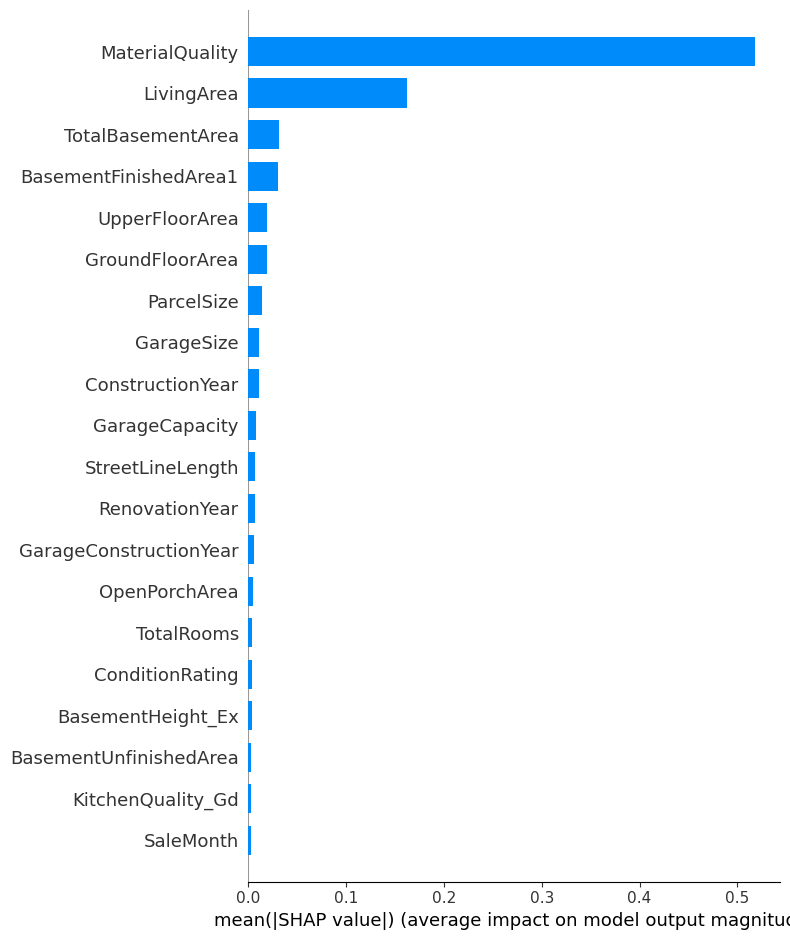

In [434]:
top_features_permutation, X_train_selected_permutation, X_test_selected_permutation=permutation_importance_method(X_train, X_test, y_train, y_test)

SHAP (SHapley Additive exPlanations)

In [435]:
def shap_importance( X_train, X_test, y_train, y_test, top_n=20):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
    ])

    pipeline.fit(X_train, y_train)

    model = pipeline.named_steps['regressor']

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(pipeline.named_steps['preprocessor'].transform(X_train))

    feature_names = (X_train.select_dtypes(include=['int64', 'float64']).columns.tolist() + 
                     pipeline.named_steps['preprocessor']
                     .transformers_[1][1]
                     .named_steps['onehot']
                     .get_feature_names_out(X_train.select_dtypes(include=['object']).columns).tolist())
    shap_abs_mean = np.mean(np.abs(shap_values), axis=0)
    indices = np.argsort(shap_abs_mean)[::-1]
    top_features = [feature_names[i] for i in indices[:top_n]]

    shap.summary_plot(shap_values, features=pipeline.named_steps['preprocessor'].transform(X_train), feature_names=feature_names, plot_type="bar")
    # تحويل البيانات باستخدام الميزات المحددة فقط
    X_train_selected = pd.DataFrame(pipeline.named_steps['preprocessor'].transform(X_train), columns=feature_names)[top_features]
    X_test_selected = pd.DataFrame(pipeline.named_steps['preprocessor'].transform(X_test), columns=feature_names)[top_features]

    return top_features, X_train_selected, X_test_selected

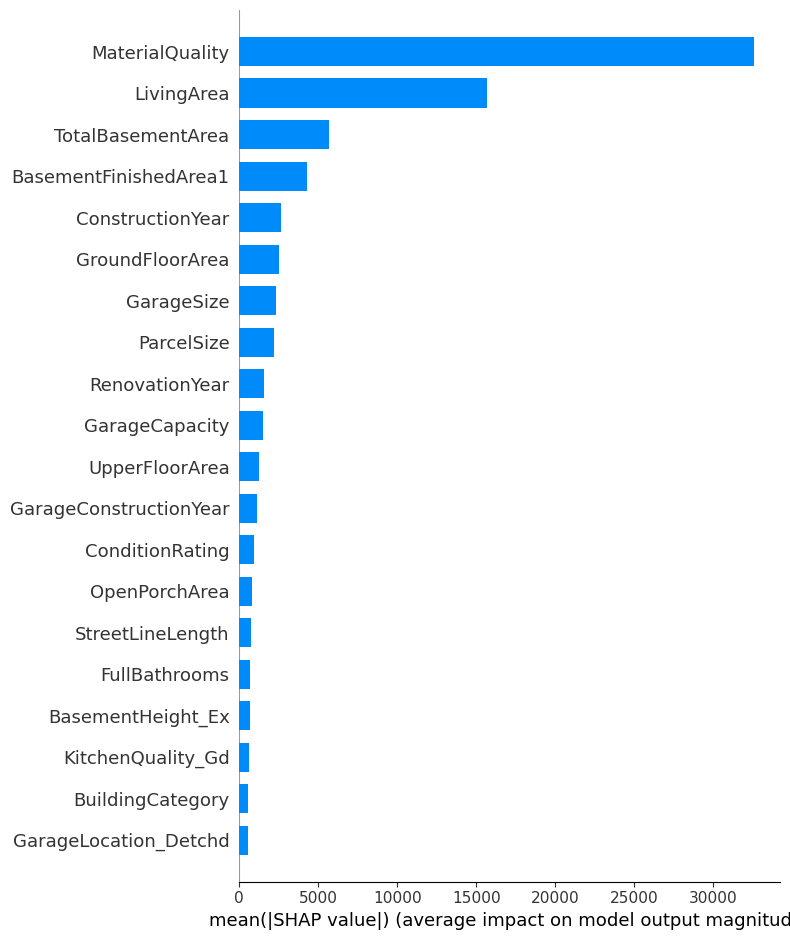

In [436]:
top_features_shap, X_train_selected_shap, X_test_selected_shap=shap_importance(X_train, X_test, y_train, y_test)

In [437]:
def select_percentile_importance(X_train, X_test, y_train, y_test, percentile=20):
    
    X_train_transformed = preprocessor.fit_transform(X_train)
    X_test_transformed = preprocessor.transform(X_test)

    select = SelectPercentile(score_func=f_regression, percentile=percentile)
    select.fit(X_train_transformed, y_train)
    X_train_selected = select.transform(X_train_transformed)
    X_test_selected = select.transform(X_test_transformed)

    feature_names = (X_train.select_dtypes(include=['int64', 'float64']).columns.tolist() + 
                     preprocessor.transformers_[1][1]
                     .named_steps['onehot']
                     .get_feature_names_out(X_train.select_dtypes(include=['object']).columns).tolist())

    selected_feature_indices = select.get_support(indices=True)
    top_features = [feature_names[i] for i in selected_feature_indices]
    # ترتيب الميزات بناءً على الدرجات
    scores = select.scores_[selected_feature_indices]
    top_features_sorted = [x for _, x in sorted(zip(scores, top_features), reverse=True)]
    top_features_scores = select.scores_[selected_feature_indices]

    # إنشاء DataFrame لعرض الميزات ونسبة أهميتها
    importance_df = pd.DataFrame({
        'Feature': top_features,
        'Score': top_features_scores
    }).sort_values(by='Score', ascending=False)

    # عرض أهمية الميزات في مخطط
    plt.figure(figsize=(15, 15))
    plt.barh(importance_df['Feature'], importance_df['Score'])
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.title('Feature Importance')
    plt.gca().invert_yaxis()
    plt.show()

    return top_features_sorted, X_train_selected, X_test_selected

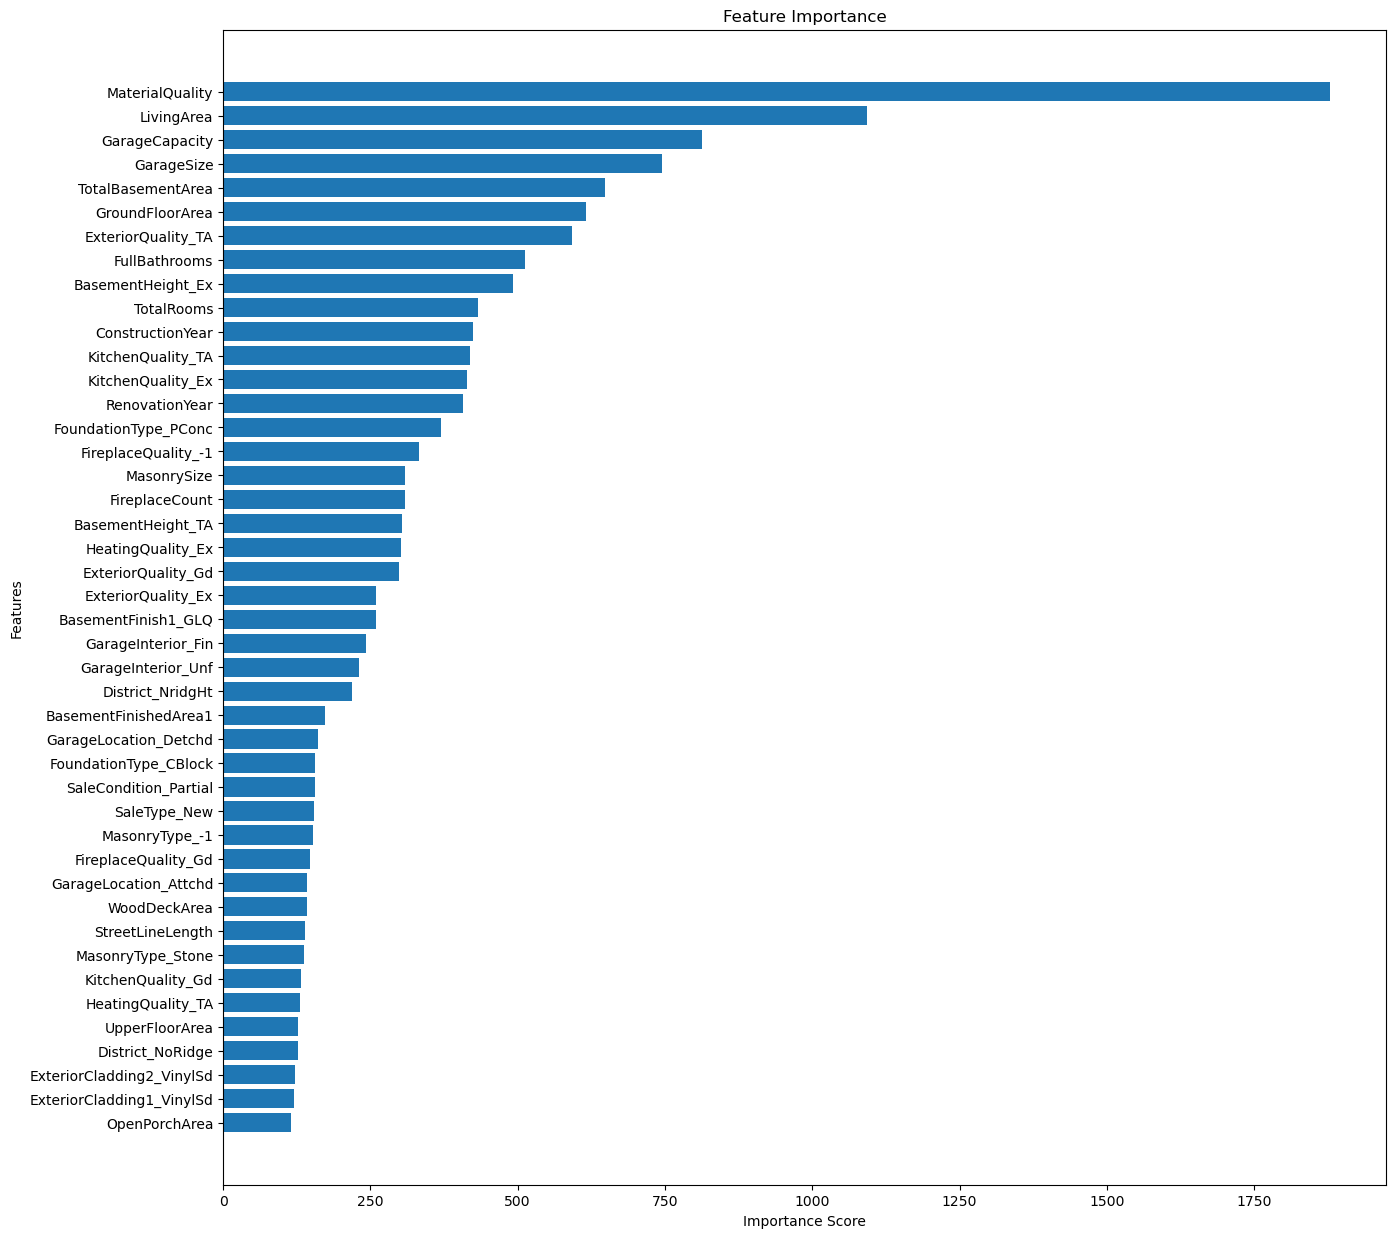

In [438]:
top_features_select_percentile, X_train_selected_select_percentile, X_test_selected_select_percentile = select_percentile_importance(X_train, X_test, y_train, y_test)

In [439]:
df = pd.DataFrame({ 
    'tree_based Importance': pd.Series(top_features_tree_based),
    'LinearRegression Importance': pd.Series(top_features_LinearRegression),
    'permutation Importance': pd.Series(top_features_permutation),
    'SHAP Importance': pd.Series(top_features_shap),
    'SelectPercentile Importance': pd.Series(top_features_select_percentile),
})


In [440]:
df

,tree_based Importance,LinearRegression Importance,permutation Importance,SHAP Importance,SelectPercentile Importance
0,MaterialQuality,BasementFinishedArea1,MaterialQuality,MaterialQuality,MaterialQuality
1,LivingArea,BasementUnfinishedArea,LivingArea,LivingArea,LivingArea
2,TotalBasementArea,TotalBasementArea,TotalBasementArea,TotalBasementArea,GarageCapacity
3,UpperFloorArea,GarageInterior_Fin,BasementFinishedArea1,BasementFinishedArea1,GarageSize
4,BasementFinishedArea1,GarageInterior_Unf,UpperFloorArea,ConstructionYear,TotalBasementArea
5,GroundFloorArea,GarageInterior_RFn,GroundFloorArea,GroundFloorArea,GroundFloorArea
6,ParcelSize,LivingArea,ParcelSize,GarageSize,ExteriorQuality_TA
7,GarageSize,BasementFinishedArea2,GarageSize,ParcelSize,FullBathrooms
8,ConstructionYear,UpperFloorArea,ConstructionYear,RenovationYear,BasementHeight_Ex
9,GarageCapacity,FireplaceQuality_-1,GarageCapacity,GarageCapacity,TotalRooms


In [450]:
from keras.backend import clear_session
clear_session()

In [583]:
comparison_table = {}

comparison_table['Model Name'] = []
comparison_table['Data Type'] = []
comparison_table['R-squared'] = []

### Linear Regression

In [441]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)
X=preprocessor.fit_transform(X)

In [442]:
pipeline = Pipeline(steps=[
    ('lr', LinearRegression())
])

# تحديد شبكة القيم
param_grid = {
    'lr__fit_intercept': [True, False],
    'lr__copy_X': [True, False],
    'lr__positive': [True, False]
}

# تنفيذ GridSearchCV
grid_search_Linear = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_search_Linear.fit(X_train, y_train)

# عرض أفضل المعاملات
print("Best parameters found: ", grid_search_Linear.best_params_)
print("Best R2 score: ", grid_search_Linear.best_score_)

Best parameters found:  {'lr__copy_X': True, 'lr__fit_intercept': False, 'lr__positive': True}
Best R2 score:  0.787067175000788


In [451]:
best_params_Linear = grid_search_Linear.best_params_
model_Linear = LinearRegression(fit_intercept=best_params_Linear['lr__fit_intercept'], copy_X=best_params_Linear['lr__copy_X'], positive=best_params_Linear['lr__positive'])
model_Linear.fit(X_train, y_train)
y_pred = model_Linear.predict(X_test)
r2_Linear = r2_score(y_test, y_pred)
print(f'R-squared: {r2_Linear}')

R-squared: 0.8640616673897336


In [260]:
# joblib.dump(model_Linear, linear_model)

In [452]:
model_Linear_selected_LinearRegression = LinearRegression()
model_Linear_selected_LinearRegression.fit(X_train_selected_LinearRegression, y_train)
y_pred = model_Linear_selected_LinearRegression.predict(X_test_selected_LinearRegression)
r2_Linear_selected_LinearRegression = r2_score(y_test, y_pred)
print(f'R-squared: {r2_Linear_selected_LinearRegression}')

R-squared: 0.7886783246030717


In [453]:
model_Linear_selected_permutation = LinearRegression()
model_Linear_selected_permutation .fit(X_train_selected_permutation, y_train)
y_pred = model_Linear_selected_permutation .predict(X_test_selected_permutation)
r2_Linear_selected_permutation = r2_score(y_test, y_pred)
print(f'R-squared: {r2_Linear_selected_permutation}')

R-squared: 0.8340039491403521


In [454]:
model_Linear_select_percentile  = LinearRegression()
model_Linear_select_percentile .fit(X_train_selected_select_percentile, y_train)
y_pred = model_Linear_select_percentile .predict(X_test_selected_select_percentile)
r2_Linear_select_percentile = r2_score(y_test, y_pred)
print(f'R-squared: {r2_Linear_select_percentile}')

R-squared: 0.8560906600956162


In [455]:
model_Linear_selected_shap = LinearRegression()
model_Linear_selected_shap.fit(X_train_selected_shap, y_train)
y_pred = model_Linear_selected_shap.predict(X_test_selected_shap)
r2_Linear_selected_shap = r2_score(y_test, y_pred)
print(f'R-squared: {r2_Linear_selected_shap}')

R-squared: 0.8330372320157824


In [456]:
model_Linear_selected_tree_based = LinearRegression()
model_Linear_selected_tree_based.fit(X_train_selected_tree_based, y_train)
y_pred = model_Linear_selected_tree_based.predict(X_test_selected_tree_based)
r2_Linear_selected_tree_based = r2_score(y_test, y_pred)
print(f'R-squared: {r2_Linear_selected_tree_based}')

R-squared: 0.8345632692718059


In [584]:
comparison_table['Model Name'].append('LinearRegression')
comparison_table['Data Type'].append('Normal Data')
comparison_table['R-squared'].append(r2_Linear)

comparison_table['Model Name'].append('LinearRegression')
comparison_table['Data Type'].append('selected features by LinearRegression')
comparison_table['R-squared'].append(r2_Linear_selected_LinearRegression)

comparison_table['Model Name'].append('LinearRegression')
comparison_table['Data Type'].append('selected features by permutation')
comparison_table['R-squared'].append(r2_Linear_selected_permutation)

comparison_table['Model Name'].append('LinearRegression')
comparison_table['Data Type'].append('selected features by percentile')
comparison_table['R-squared'].append(r2_Linear_select_percentile)

comparison_table['Model Name'].append('LinearRegression')
comparison_table['Data Type'].append('selected features by shap')
comparison_table['R-squared'].append(r2_Linear_selected_shap)

comparison_table['Model Name'].append('LinearRegression')
comparison_table['Data Type'].append('selected features by random forest')
comparison_table['R-squared'].append(r2_Linear_selected_tree_based)

### Logistic Regression

In [28]:
# # إعداد المراحل
# pipeline = Pipeline(steps=[
#     ('lr', LogisticRegression())
# ])

# # تحديد شبكة القيم
# param_grid = {
#     'lr__penalty': ['l1', 'l2', 'elasticnet', 'none'],
#     'lr__C': [0.01, 0.1, 1, 10, 100],
#     'lr__solver': ['liblinear', 'saga']
# }

# # تنفيذ GridSearchCV
# grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')ش
# grid_search.fit(X_train, y_train)

# # عرض أفضل المعاملات
# print("Best parameters found: ", grid_search.best_params_)
# print("Best Accuracy score: ", grid_search.best_score_)

# Best parameters found:  {'lr__C': 0.1, 'lr__penalty': 'l2', 'lr__solver': 'saga'}
# Best Accuracy score:  0.019680129122189208

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
75 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estima

Best parameters found:  {'lr__C': 0.1, 'lr__penalty': 'l2', 'lr__solver': 'saga'}
Best Accuracy score:  0.019680129122189208


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [521]:
# model = LogisticRegression(max_iter=1000) 
# model.fit(X_train, y_train)
# print("Score with all features: {:.3f}".format(model.score(X_test, y_test)))

Score with all features: 0.010


In [48]:
# model = LogisticRegression(penalty=None, max_iter=10000) 
# model.fit(X_train_selected_LinearRegression, y_train)
# print("Score with all features: {:.3f}".format(model.score(X_test_selected_LinearRegression, y_test)))

Score with all features: 0.007


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
# model = LogisticRegression(penalty=None, max_iter=1000) 
# model.fit(X_train_selected_permutation, y_train)
# print("Score with all features: {:.3f}".format(model.score(X_test_selected_permutation, y_test)))

Score with all features: 0.003


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
# model = LogisticRegression(penalty=None, max_iter=1000) 
# model.fit(X_train_selected_select_percentile, y_train)
# print("Score with all features: {:.3f}".format(model.score(X_test_selected_select_percentile, y_test)))

In [51]:
# model = LogisticRegression(penalty=None, max_iter=10000) 
# model.fit(X_train_selected_shap, y_train)
# print("Score with all features: {:.3f}".format(model.score(X_test_selected_shap, y_test)))

In [52]:
# model = LogisticRegression(penalty=None, max_iter=10000) 
# model.fit(X_train_selected_tree_based, y_train)
# print("Score with all features: {:.3f}".format(model.score(X_test_selected_tree_based, y_test)))

### Decision Tree

In [244]:
# إعداد المراحل
pipeline = Pipeline(steps=[
    ('dtr', DecisionTreeRegressor())
])

# تحديد شبكة القيم
param_grid = {
    'dtr__max_depth': [None, 10, 20, 30],
    'dtr__min_samples_split': [2, 5, 10],
    'dtr__min_samples_leaf': [1, 2, 4]
}

# تنفيذ GridSearchCV
grid_searchDecision_Tree = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_searchDecision_Tree.fit(X_train, y_train)

# عرض أفضل المعاملات
print("Best parameters found: ", grid_searchDecision_Tree.best_params_)
print("Best R2 score: ", grid_searchDecision_Tree.best_score_)

Best parameters found:  {'dtr__max_depth': 20, 'dtr__min_samples_leaf': 1, 'dtr__min_samples_split': 2}
Best R2 score:  0.7149978231720207


In [457]:
best_params = grid_searchDecision_Tree.best_params_
model_DecisionTree = DecisionTreeRegressor(max_depth=best_params['dtr__max_depth'], 
                              min_samples_leaf=best_params['dtr__min_samples_leaf'], 
                              min_samples_split=best_params['dtr__min_samples_split'])

model_DecisionTree.fit(X_train, y_train)
y_pred = model_DecisionTree.predict(X_test)
r2_DecisionTree = r2_score(y_test, y_pred)
print(f'R-squared: {r2_DecisionTree}')

R-squared: 0.775829949606176


In [458]:
model_DecisionTree_selected_LinearRegression = DecisionTreeRegressor(max_depth=best_params['dtr__max_depth'], 
                              min_samples_leaf=best_params['dtr__min_samples_leaf'], 
                              min_samples_split=best_params['dtr__min_samples_split'])
model_DecisionTree_selected_LinearRegression.fit(X_train_selected_LinearRegression, y_train)
y_pred = model_DecisionTree_selected_LinearRegression.predict(X_test_selected_LinearRegression)
r2_DecisionTree_selected_LinearRegression  = r2_score(y_test, y_pred)
print(f'R-squared: {r2_DecisionTree_selected_LinearRegression }')

R-squared: 0.753250422726865


In [459]:
model_DecisionTree_selected_permutation = DecisionTreeRegressor(max_depth=best_params['dtr__max_depth'], 
                              min_samples_leaf=best_params['dtr__min_samples_leaf'], 
                              min_samples_split=best_params['dtr__min_samples_split'])
model_DecisionTree_selected_permutation.fit(X_train_selected_permutation, y_train)
y_pred = model_DecisionTree_selected_permutation.predict(X_test_selected_permutation)
r2_DecisionTree_selected_permutation = r2_score(y_test, y_pred)
print(f'R-squared: {r2_DecisionTree_selected_permutation}')

R-squared: 0.7924839293866229


In [460]:
model_DecisionTree_select_percentile = DecisionTreeRegressor(max_depth=best_params['dtr__max_depth'], 
                              min_samples_leaf=best_params['dtr__min_samples_leaf'], 
                              min_samples_split=best_params['dtr__min_samples_split'])
model_DecisionTree_select_percentile.fit(X_train_selected_select_percentile, y_train)
y_pred = model_DecisionTree_select_percentile.predict(X_test_selected_select_percentile)
r2_DecisionTree_select_percentile = r2_score(y_test, y_pred)
print(f'R-squared: {r2_DecisionTree_select_percentile}')

R-squared: 0.7646272298068697


In [272]:
# joblib.dump(model, DecisionTree_model)

In [461]:
model_DecisionTree_selected_shap = DecisionTreeRegressor(max_depth=best_params['dtr__max_depth'], 
                              min_samples_leaf=best_params['dtr__min_samples_leaf'], 
                              min_samples_split=best_params['dtr__min_samples_split'])
model_DecisionTree_selected_shap.fit(X_train_selected_shap, y_train)
y_pred = model_DecisionTree_selected_shap.predict(X_test_selected_shap)
r2_DecisionTree_selected_shap = r2_score(y_test, y_pred)
print(f'R-squared: {r2_DecisionTree_selected_shap}')

R-squared: 0.7835401914329361


In [462]:
model_DecisionTree_selected_tree_based = DecisionTreeRegressor(max_depth=best_params['dtr__max_depth'], 
                              min_samples_leaf=best_params['dtr__min_samples_leaf'], 
                              min_samples_split=best_params['dtr__min_samples_split'])
model_DecisionTree_selected_tree_based.fit(X_train_selected_tree_based, y_train)
y_pred = model_DecisionTree_selected_tree_based.predict(X_test_selected_tree_based)
r2_DecisionTree_selected_tree_based = r2_score(y_test, y_pred)
print(f'R-squared: {r2_DecisionTree_selected_tree_based}')

R-squared: 0.7858942028058779


In [585]:
comparison_table['Model Name'].append('DecisionTreeRegressor')
comparison_table['Data Type'].append('Normal Data')
comparison_table['R-squared'].append(r2_DecisionTree)

comparison_table['Model Name'].append('DecisionTreeRegressor')
comparison_table['Data Type'].append('selected features by LinearRegression')
comparison_table['R-squared'].append(r2_DecisionTree_selected_LinearRegression)

comparison_table['Model Name'].append('DecisionTreeRegressor')
comparison_table['Data Type'].append('selected features by permutation')
comparison_table['R-squared'].append(r2_DecisionTree_selected_permutation)

comparison_table['Model Name'].append('DecisionTreeRegressor')
comparison_table['Data Type'].append('selected features by percentile')
comparison_table['R-squared'].append(r2_DecisionTree_select_percentile)

comparison_table['Model Name'].append('DecisionTreeRegressor')
comparison_table['Data Type'].append('selected features by shap')
comparison_table['R-squared'].append(r2_DecisionTree_selected_shap)

comparison_table['Model Name'].append('DecisionTreeRegressor')
comparison_table['Data Type'].append('selected features by random forest')
comparison_table['R-squared'].append(r2_DecisionTree_selected_tree_based)

### Random Forest

In [245]:
pipeline = Pipeline(steps=[
    # ('preprocessor', preprocessor),
    # ('postprocessor', postprocessor),
    ('rfr', RandomForestRegressor())
])

# تحديد شبكة القيم
param_grid = {
    'rfr__n_estimators': [100, 200, 500],
    'rfr__max_depth': [None, 10, 20, 30],
    'rfr__min_samples_split': [2, 5, 10],
    'rfr__min_samples_leaf': [1, 2, 4]
}

# تنفيذ GridSearchCV
grid_searchRandom_Forest = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_searchRandom_Forest.fit(X_train, y_train)

# عرض أفضل المعاملات
print("Best parameters found: ", grid_searchRandom_Forest.best_params_)
print("Best R2 score: ", grid_searchRandom_Forest.best_score_)


Best parameters found:  {'rfr__max_depth': 10, 'rfr__min_samples_leaf': 1, 'rfr__min_samples_split': 2, 'rfr__n_estimators': 200}
Best R2 score:  0.8426635823163426


In [463]:
best_params = grid_searchRandom_Forest.best_params_
model_RandomForest = RandomForestRegressor(max_depth=best_params['rfr__max_depth'], 
                              min_samples_leaf=best_params['rfr__min_samples_leaf'], 
                              min_samples_split=best_params['rfr__min_samples_split'], 
                              n_estimators=best_params['rfr__n_estimators'])
model_RandomForest.fit(X_train, y_train)
y_pred = model_RandomForest.predict(X_test)
r2_RandomForest = r2_score(y_test, y_pred)
print(f'R-squared: {r2_RandomForest}')

R-squared: 0.8929646731893275


In [464]:
model_RandomForest_selected_LinearRegression = RandomForestRegressor(max_depth=best_params['rfr__max_depth'], 
                              min_samples_leaf=best_params['rfr__min_samples_leaf'], 
                              min_samples_split=best_params['rfr__min_samples_split'], 
                              n_estimators=best_params['rfr__n_estimators'])
model_RandomForest_selected_LinearRegression.fit(X_train_selected_LinearRegression, y_train)
y_pred = model_RandomForest_selected_LinearRegression.predict(X_test_selected_LinearRegression)
r2_RandomForest_selected_LinearRegression = r2_score(y_test, y_pred)
print(f'R-squared: {r2_RandomForest_selected_LinearRegression}')

R-squared: 0.8424823420015607


In [465]:
model_RandomForest_selected_permutation = RandomForestRegressor(max_depth=best_params['rfr__max_depth'], 
                              min_samples_leaf=best_params['rfr__min_samples_leaf'], 
                              min_samples_split=best_params['rfr__min_samples_split'], 
                              n_estimators=best_params['rfr__n_estimators'])
model_RandomForest_selected_permutation.fit(X_train_selected_permutation, y_train)
y_pred = model_RandomForest_selected_permutation.predict(X_test_selected_permutation)
r2_RandomForest_selected_permutation = r2_score(y_test, y_pred)
print(f'R-squared: {r2_RandomForest_selected_permutation}')


R-squared: 0.8953405760178859


In [466]:
model_RandomForest_select_percentile = RandomForestRegressor(max_depth=best_params['rfr__max_depth'], 
                              min_samples_leaf=best_params['rfr__min_samples_leaf'], 
                              min_samples_split=best_params['rfr__min_samples_split'], 
                              n_estimators=best_params['rfr__n_estimators'])
model_RandomForest_select_percentile.fit(X_train_selected_select_percentile, y_train)
y_pred = model_RandomForest_select_percentile.predict(X_test_selected_select_percentile)
r2_RandomForest_select_percentile = r2_score(y_test, y_pred)
print(f'R-squared: {r2_RandomForest_select_percentile}')


R-squared: 0.887627718372201


In [467]:
model_RandomForest_selected_shap = RandomForestRegressor(max_depth=best_params['rfr__max_depth'], 
                              min_samples_leaf=best_params['rfr__min_samples_leaf'], 
                              min_samples_split=best_params['rfr__min_samples_split'], 
                              n_estimators=best_params['rfr__n_estimators'])
model_RandomForest_selected_shap.fit(X_train_selected_shap, y_train)
y_pred = model_RandomForest_selected_shap.predict(X_test_selected_shap)
r2_RandomForest_selected_shap = r2_score(y_test, y_pred)
print(f'R-squared: {r2_RandomForest_selected_shap}')

R-squared: 0.8960363363280099


In [280]:
# joblib.dump(model_RandomForest_selected_shap,RandomForest_model)

In [468]:
model_RandomForest_selected_tree_based= RandomForestRegressor(max_depth=best_params['rfr__max_depth'], 
                              min_samples_leaf=best_params['rfr__min_samples_leaf'], 
                              min_samples_split=best_params['rfr__min_samples_split'], 
                              n_estimators=best_params['rfr__n_estimators'])
model_RandomForest_selected_tree_based.fit(X_train_selected_tree_based, y_train)
y_pred = model_RandomForest_selected_tree_based.predict(X_test_selected_tree_based)
r2_RandomForest_selected_tree_based = r2_score(y_test, y_pred)
print(f'R-squared: {r2_RandomForest_selected_tree_based}')

R-squared: 0.8901933432823056


In [586]:
comparison_table['Model Name'].append('RandomForestRegressor')
comparison_table['Data Type'].append('Normal Data')
comparison_table['R-squared'].append(r2_RandomForest)

comparison_table['Model Name'].append('RandomForestRegressor')
comparison_table['Data Type'].append('selected features by LinearRegression')
comparison_table['R-squared'].append(r2_RandomForest_selected_LinearRegression)

comparison_table['Model Name'].append('RandomForestRegressor')
comparison_table['Data Type'].append('selected features by permutation')
comparison_table['R-squared'].append(r2_RandomForest_selected_permutation)

comparison_table['Model Name'].append('RandomForestRegressor')
comparison_table['Data Type'].append('selected features by percentile')
comparison_table['R-squared'].append(r2_RandomForest_select_percentile)

comparison_table['Model Name'].append('RandomForestRegressor')
comparison_table['Data Type'].append('selected features by shap')
comparison_table['R-squared'].append(r2_RandomForest_selected_shap)

comparison_table['Model Name'].append('RandomForestRegressor')
comparison_table['Data Type'].append('selected features by random forest')
comparison_table['R-squared'].append(r2_RandomForest_selected_tree_based)

### Support Vector Machines

In [282]:
pipeline = Pipeline(steps=[
    ('svr', SVR())
])

# تحديد شبكة القيم
param_grid = {
    'svr__kernel': ['linear', 'poly', 'rbf'],
    'svr__C': [0.1, 1, 10, 100],
    'svr__gamma': ['scale', 'auto']
}

# تنفيذ GridSearchCV
grid_searchSVR = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_searchSVR.fit(X_train, y_train)

# عرض أفضل المعاملات
print("Best parameters found: ", grid_searchSVR.best_params_)
print("Best R2 score: ", grid_searchSVR.best_score_)

Best parameters found:  {'svr__C': 100, 'svr__gamma': 'scale', 'svr__kernel': 'linear'}
Best R2 score:  0.8046400115657132


In [479]:
best_paramsSVR = grid_searchSVR.best_params_
model_SVR = SVR(kernel=best_paramsSVR['svr__kernel'], C=best_paramsSVR['svr__C'], gamma=best_paramsSVR['svr__gamma'])
model_SVR.fit(X_train, y_train)
y_pred = model_SVR.predict(X_test)
r2_SVR = r2_score(y_test, y_pred)
print(f'R-squared: {r2_SVR}')

R-squared: 0.8395142212078645


In [284]:
# joblib.dump(model,SVR_model)

In [480]:
model_SVR_selected_LinearRegression = SVR(kernel=best_paramsSVR['svr__kernel'], C=best_paramsSVR['svr__C'], gamma=best_paramsSVR['svr__gamma'])
model_SVR_selected_LinearRegression.fit(X_train_selected_LinearRegression, y_train)
y_pred = model_SVR_selected_LinearRegression.predict(X_test_selected_LinearRegression)
r2_SVR_selected_LinearRegression = r2_score(y_test, y_pred)
print(f'R-squared: {r2_SVR_selected_LinearRegression}')

R-squared: 0.6948070976695269


In [481]:
model_SVR_selected_permutation = SVR(kernel=best_paramsSVR['svr__kernel'], C=best_paramsSVR['svr__C'], gamma=best_paramsSVR['svr__gamma'])
model_SVR_selected_permutation.fit(X_train_selected_permutation, y_train)
y_pred = model_SVR_selected_permutation.predict(X_test_selected_permutation)
r2_SVR_selected_permutation = r2_score(y_test, y_pred)
print(f'R-squared: {r2_SVR_selected_permutation}')


R-squared: 0.7882377217968695


In [482]:
model_SVR_select_percentile = SVR(kernel=best_paramsSVR['svr__kernel'], C=best_paramsSVR['svr__C'], gamma=best_paramsSVR['svr__gamma'])
model_SVR_select_percentile.fit(X_train_selected_select_percentile, y_train)
y_pred = model_SVR_select_percentile.predict(X_test_selected_select_percentile)
r2_SVR_select_percentile = r2_score(y_test, y_pred)
print(f'R-squared: {r2_SVR_select_percentile}')

R-squared: 0.8162857772867702


In [483]:
model_SVR_selected_shap = SVR(kernel=best_paramsSVR['svr__kernel'], C=best_paramsSVR['svr__C'], gamma=best_paramsSVR['svr__gamma'])
model_SVR_selected_shap.fit(X_train_selected_shap, y_train)
y_pred = model_SVR_selected_shap.predict(X_test_selected_shap)
r2_SVR_selected_shap = r2_score(y_test, y_pred)
print(f'R-squared: {r2_SVR_selected_shap}')

R-squared: 0.7835642077439106


In [484]:
model_SVR_selected_tree_based = SVR(kernel=best_paramsSVR['svr__kernel'], C=best_paramsSVR['svr__C'], gamma=best_paramsSVR['svr__gamma'])
model_SVR_selected_tree_based.fit(X_train_selected_tree_based, y_train)
y_pred = model_SVR_selected_tree_based.predict(X_test_selected_tree_based)
r2_SVR_selected_tree_based = r2_score(y_test, y_pred)
print(f'R-squared: {r2_SVR_selected_tree_based}')

R-squared: 0.7899377177696912


In [587]:
comparison_table['Model Name'].append('SVR')
comparison_table['Data Type'].append('Normal Data')
comparison_table['R-squared'].append(r2_SVR)

comparison_table['Model Name'].append('SVR')
comparison_table['Data Type'].append('selected features by LinearRegression')
comparison_table['R-squared'].append(r2_SVR_selected_LinearRegression)

comparison_table['Model Name'].append('SVR')
comparison_table['Data Type'].append('selected features by permutation')
comparison_table['R-squared'].append(r2_SVR_selected_permutation)

comparison_table['Model Name'].append('SVR')
comparison_table['Data Type'].append('selected features by percentile')
comparison_table['R-squared'].append(r2_SVR_select_percentile)

comparison_table['Model Name'].append('SVR')
comparison_table['Data Type'].append('selected features by shap')
comparison_table['R-squared'].append(r2_SVR_selected_shap)

comparison_table['Model Name'].append('SVR')
comparison_table['Data Type'].append('selected features by random forest')
comparison_table['R-squared'].append(r2_SVR_selected_tree_based)

### MLPRegressor

In [246]:
# إعداد المراحل
pipeline = Pipeline(steps=[
    ('mlp', MLPRegressor())
])

# تحديد شبكة القيم
param_grid = {
    'mlp__hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'mlp__activation': ['tanh', 'relu'],
    'mlp__solver': ['sgd', 'adam'],
    'mlp__alpha': [0.0001, 0.05],
    'mlp__learning_rate': ['constant','adaptive']
}

# تنفيذ GridSearchCV
grid_searchMLP = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_searchMLP.fit(X_train, y_train)

# عرض أفضل المعاملات
print("Best parameters found: ", grid_searchMLP.best_params_)
print("Best R2 score: ", grid_searchMLP.best_score_)


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
42 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
42 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estimator.fit(Xt

Best parameters found:  {'mlp__activation': 'relu', 'mlp__alpha': 0.05, 'mlp__hidden_layer_sizes': (50, 100, 50), 'mlp__learning_rate': 'adaptive', 'mlp__solver': 'adam'}
Best R2 score:  0.8021797702318529


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [485]:
best_params = grid_searchMLP.best_params_
model_MLP = MLPRegressor(hidden_layer_sizes=best_params['mlp__hidden_layer_sizes'], 
                     activation=best_params['mlp__activation'], 
                     solver=best_params['mlp__solver'], 
                     alpha=best_params['mlp__alpha'], 
                     learning_rate=best_params['mlp__learning_rate'],
                     max_iter=1000)  # زيادة max_iter إلى 1000
model_MLP.fit(X_train, y_train)
y_pred = model_MLP.predict(X_test)
r2_MLP = r2_score(y_test, y_pred)
print(f'R-squared: {r2_MLP}')

R-squared: 0.87887599666297


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [486]:
model_MLP_selected_LinearRegression = MLPRegressor(hidden_layer_sizes=best_params['mlp__hidden_layer_sizes'], 
                     activation=best_params['mlp__activation'], 
                     solver=best_params['mlp__solver'], 
                     alpha=best_params['mlp__alpha'], 
                     learning_rate=best_params['mlp__learning_rate'],
                     max_iter=1000)  # زيادة max_iter إلى 1000
model_MLP_selected_LinearRegression.fit(X_train_selected_LinearRegression, y_train)
y_pred = model_MLP_selected_LinearRegression.predict(X_test_selected_LinearRegression)
r2_MLP_selected_LinearRegression = r2_score(y_test, y_pred)
print(f'R-squared: {r2_MLP_selected_LinearRegression}')


R-squared: 0.808825287643377


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [292]:
# data['MasonryType'].value_counts()

In [487]:
model_MLP_selected_permutation= MLPRegressor(hidden_layer_sizes=best_params['mlp__hidden_layer_sizes'], 
                     activation=best_params['mlp__activation'], 
                     solver=best_params['mlp__solver'], 
                     alpha=best_params['mlp__alpha'], 
                     learning_rate=best_params['mlp__learning_rate'],
                     max_iter=1000)  # زيادة max_iter إلى 1000
model_MLP_selected_permutation.fit(X_train_selected_permutation, y_train)
y_pred = model_MLP_selected_permutation.predict(X_test_selected_permutation)
r2_MLP_selected_permutation = r2_score(y_test, y_pred)
print(f'R-squared: {r2_MLP_selected_permutation}')

R-squared: 0.8601011747956724


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [488]:
model_MLP_select_percentile = MLPRegressor(hidden_layer_sizes=best_params['mlp__hidden_layer_sizes'], 
                     activation=best_params['mlp__activation'], 
                     solver=best_params['mlp__solver'], 
                     alpha=best_params['mlp__alpha'], 
                     learning_rate=best_params['mlp__learning_rate'],
                     max_iter=1000)  # زيادة max_iter إلى 1000
model_MLP_select_percentile.fit(X_train_selected_select_percentile, y_train)
y_pred = model_MLP_select_percentile.predict(X_test_selected_select_percentile)
r2_MLP_select_percentile = r2_score(y_test, y_pred)
print(f'R-squared: {r2_MLP_select_percentile}')

R-squared: 0.871049066711382


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [295]:
# joblib.dump(model,MLP_model)

In [489]:
model_MLP_selected_shap = MLPRegressor(hidden_layer_sizes=best_params['mlp__hidden_layer_sizes'], 
                     activation=best_params['mlp__activation'], 
                     solver=best_params['mlp__solver'], 
                     alpha=best_params['mlp__alpha'], 
                     learning_rate=best_params['mlp__learning_rate'],
                     max_iter=10000)  # زيادة max_iter إلى 1000
model_MLP_selected_shap.fit(X_train_selected_shap, y_train)
y_pred = model_MLP_selected_shap.predict(X_test_selected_shap)
r2_MLP_selected_shap = r2_score(y_test, y_pred)
print(f'R-squared: {r2_MLP_selected_shap}')

R-squared: 0.875663532116647


In [490]:
model_MLP_selected_tree_based = MLPRegressor(hidden_layer_sizes=best_params['mlp__hidden_layer_sizes'], 
                     activation=best_params['mlp__activation'], 
                     solver=best_params['mlp__solver'], 
                     alpha=best_params['mlp__alpha'], 
                     learning_rate=best_params['mlp__learning_rate'],
                     max_iter=10000)  # زيادة max_iter إلى 1000
model_MLP_selected_tree_based.fit(X_train_selected_tree_based, y_train)
y_pred = model_MLP_selected_tree_based.predict(X_test_selected_tree_based)
r2_MLP_selected_tree_based = r2_score(y_test, y_pred)
print(f'R-squared: {r2_MLP_selected_tree_based}')

R-squared: 0.8617153980820504


In [588]:
comparison_table['Model Name'].append('MLPRegressor')
comparison_table['Data Type'].append('Normal Data')
comparison_table['R-squared'].append(r2_MLP)

comparison_table['Model Name'].append('MLPRegressor')
comparison_table['Data Type'].append('selected features by LinearRegression')
comparison_table['R-squared'].append(r2_MLP_selected_LinearRegression)

comparison_table['Model Name'].append('MLPRegressor')
comparison_table['Data Type'].append('selected features by permutation')
comparison_table['R-squared'].append(r2_MLP_selected_permutation)

comparison_table['Model Name'].append('MLPRegressor')
comparison_table['Data Type'].append('selected features by percentile')
comparison_table['R-squared'].append(r2_MLP_select_percentile)

comparison_table['Model Name'].append('MLPRegressor')
comparison_table['Data Type'].append('selected features by shap')
comparison_table['R-squared'].append(r2_MLP_selected_shap)

comparison_table['Model Name'].append('MLPRegressor')
comparison_table['Data Type'].append('selected features by random forest')
comparison_table['R-squared'].append(r2_MLP_selected_tree_based)

### K-Nearest Neighbors - KNN

In [298]:
pipeline = Pipeline(steps=[
    ('knn', KNeighborsRegressor())
])

# تحديد شبكة القيم
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 10],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']
}

# تنفيذ GridSearchCV
grid_searchKNN = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_searchKNN.fit(X_train, y_train)

# عرض أفضل المعاملات
print("Best parameters found: ", grid_searchKNN.best_params_)
print("Best R2 score: ", grid_searchKNN.best_score_)

Best parameters found:  {'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__weights': 'distance'}
Best R2 score:  0.8040569370675005


In [527]:
best_params = grid_searchKNN.best_params_
model_KNN = KNeighborsRegressor(n_neighbors=best_params['knn__n_neighbors'], weights=best_params['knn__weights'], metric=best_params['knn__metric'])
model_KNN.fit(X_train, y_train)
y_pred = model_KNN.predict(X_test)
r2_KNN = r2_score(y_test, y_pred)
print(f'R-squared: {r2_KNN}')


R-squared: 0.8525778278107659


In [528]:
model_KNN_selected_LinearRegression = KNeighborsRegressor(n_neighbors=best_params['knn__n_neighbors'], weights=best_params['knn__weights'], metric=best_params['knn__metric'])
model_KNN_selected_LinearRegression.fit(X_train_selected_LinearRegression, y_train)
y_pred = model_KNN_selected_LinearRegression.predict(X_test_selected_LinearRegression)
r2_KNN_selected_LinearRegression = r2_score(y_test, y_pred)
print(f'R-squared: {r2_KNN_selected_LinearRegression}')

R-squared: 0.8144563545760426


In [ ]:
model_KNN_selected_permutation = KNeighborsRegressor(n_neighbors=best_params['knn__n_neighbors'], weights=best_params['knn__weights'], metric=best_params['knn__metric'])
model_KNN_selected_permutation.fit(X_train_selected_permutation, y_train)
y_pred = model_KNN_selected_permutation.predict(X_test_selected_permutation)
r2_KNN_selected_permutation = r2_score(y_test, y_pred)
print(f'R-squared: {r2_KNN_selected_permutation}')

R-squared: 0.8860554629524143


In [494]:
model_KNN_select_percentile = KNeighborsRegressor(n_neighbors=best_params['knn__n_neighbors'], weights=best_params['knn__weights'], metric=best_params['knn__metric'])
model_KNN_select_percentile.fit(X_train_selected_select_percentile, y_train)
y_pred = model_KNN_select_percentile.predict(X_test_selected_select_percentile)
r2_KNN_select_percentile = r2_score(y_test, y_pred)
print(f'R-squared: {r2_KNN_select_percentile}')

R-squared: 0.8775557660376723


In [495]:
model_KNN_selected_shap = KNeighborsRegressor(n_neighbors=best_params['knn__n_neighbors'], weights=best_params['knn__weights'], metric=best_params['knn__metric'])
model_KNN_selected_shap.fit(X_train_selected_shap, y_train)
y_pred = model_KNN_selected_shap.predict(X_test_selected_shap)
r2_KNN_selected_shap = r2_score(y_test, y_pred)
print(f'R-squared: {r2_KNN_selected_shap}')

R-squared: 0.8901372401346923


In [304]:
# joblib.dump(model,KNN_model)

In [496]:
model_KNN_selected_tree_based = KNeighborsRegressor(n_neighbors=best_params['knn__n_neighbors'], weights=best_params['knn__weights'], metric=best_params['knn__metric'])
model_KNN_selected_tree_based.fit(X_train_selected_tree_based, y_train)
y_pred = model_KNN_selected_tree_based.predict(X_test_selected_tree_based)
r2_KNN_selected_tree_based = r2_score(y_test, y_pred)
print(f'R-squared: {r2_KNN_selected_tree_based}')

R-squared: 0.8860005209407834


In [589]:
comparison_table['Model Name'].append('KNeighborsRegressor')
comparison_table['Data Type'].append('Normal Data')
comparison_table['R-squared'].append(r2_KNN)

comparison_table['Model Name'].append('KNeighborsRegressor')
comparison_table['Data Type'].append('selected features by LinearRegression')
comparison_table['R-squared'].append(r2_KNN_selected_LinearRegression)

comparison_table['Model Name'].append('KNeighborsRegressor')
comparison_table['Data Type'].append('selected features by permutation')
comparison_table['R-squared'].append(r2_KNN_selected_permutation)

comparison_table['Model Name'].append('KNeighborsRegressor')
comparison_table['Data Type'].append('selected features by percentile')
comparison_table['R-squared'].append(r2_KNN_select_percentile)

comparison_table['Model Name'].append('KNeighborsRegressor')
comparison_table['Data Type'].append('selected features by shap')
comparison_table['R-squared'].append(r2_KNN_selected_shap)

comparison_table['Model Name'].append('KNeighborsRegressor')
comparison_table['Data Type'].append('selected features by random forest')
comparison_table['R-squared'].append(r2_KNN_selected_tree_based)

### Ridge Regression

In [306]:
pipeline = Pipeline(steps=[
    ('ridge', Ridge())
])

# تحديد شبكة القيم
param_grid = {
    'ridge__alpha': [0.1, 1, 10, 100, 200]
}

# تنفيذ GridSearchCV
grid_searchRidge = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_searchRidge.fit(X_train, y_train)

# عرض أفضل المعاملات
print("Best parameters found: ", grid_searchRidge.best_params_)
print("Best R2 score: ", grid_searchRidge.best_score_)

Best parameters found:  {'ridge__alpha': 10}
Best R2 score:  0.8144889739190507


In [497]:
best_params = grid_searchRidge.best_params_
model_Ridge = Ridge(alpha=best_params['ridge__alpha'])
model_Ridge.fit(X_train, y_train)
y_pred = model_Ridge.predict(X_test)
r2_Ridge = r2_score(y_test, y_pred)
print(f'R-squared: {r2_Ridge}')

R-squared: 0.8745167629047728


In [308]:
# joblib.dump(model,Ridge_model)

In [498]:
model_Ridge_selected_LinearRegression = Ridge(alpha=best_params['ridge__alpha'])
model_Ridge_selected_LinearRegression.fit(X_train_selected_LinearRegression, y_train)
y_pred = model_Ridge_selected_LinearRegression.predict(X_test_selected_LinearRegression)
r2_Ridge_selected_LinearRegression = r2_score(y_test, y_pred)
print(f'R-squared: {r2_Ridge_selected_LinearRegression}')

R-squared: 0.787377387419699


In [499]:
model_Ridge_selected_permutation = Ridge(alpha=best_params['ridge__alpha'])
model_Ridge_selected_permutation.fit(X_train_selected_permutation, y_train)
y_pred = model_Ridge_selected_permutation.predict(X_test_selected_permutation)
r2_Ridge_selected_permutation = r2_score(y_test, y_pred)
print(f'R-squared: {r2_Ridge_selected_permutation}')

R-squared: 0.8329231719508223


In [500]:
model_Ridge_select_percentile = Ridge(alpha=best_params['ridge__alpha'])
model_Ridge_select_percentile.fit(X_train_selected_select_percentile, y_train)
y_pred = model_Ridge_select_percentile.predict(X_test_selected_select_percentile)
r2_Ridge_select_percentile = r2_score(y_test, y_pred)
print(f'R-squared: {r2_Ridge_select_percentile}')

R-squared: 0.8550047244950892


In [501]:
model_Ridge_selected_shap = Ridge(alpha=best_params['ridge__alpha'])
model_Ridge_selected_shap.fit(X_train_selected_shap, y_train)
y_pred = model_Ridge_selected_shap.predict(X_test_selected_shap)
r2_Ridge_selected_shap = r2_score(y_test, y_pred)
print(f'R-squared: {r2_Ridge_selected_shap}')

R-squared: 0.8327200195640614


In [502]:
model_Ridge_selected_tree_based = Ridge(alpha=best_params['ridge__alpha'])
model_Ridge_selected_tree_based.fit(X_train_selected_tree_based, y_train)
y_pred = model_Ridge_selected_tree_based.predict(X_test_selected_tree_based)
r2_Ridge_selected_tree_based = r2_score(y_test, y_pred)
print(f'R-squared: {r2_Ridge_selected_tree_based}')

R-squared: 0.8334325009532524


In [590]:
comparison_table['Model Name'].append('Ridge')
comparison_table['Data Type'].append('Normal Data')
comparison_table['R-squared'].append(r2_Ridge)

comparison_table['Model Name'].append('Ridge')
comparison_table['Data Type'].append('selected features by LinearRegression')
comparison_table['R-squared'].append(r2_Ridge_selected_LinearRegression)

comparison_table['Model Name'].append('Ridge')
comparison_table['Data Type'].append('selected features by permutation')
comparison_table['R-squared'].append(r2_Ridge_selected_permutation)

comparison_table['Model Name'].append('Ridge')
comparison_table['Data Type'].append('selected features by percentile')
comparison_table['R-squared'].append(r2_Ridge_select_percentile)

comparison_table['Model Name'].append('Ridge')
comparison_table['Data Type'].append('selected features by shap')
comparison_table['R-squared'].append(r2_Ridge_selected_shap)

comparison_table['Model Name'].append('Ridge')
comparison_table['Data Type'].append('selected features by random forest')
comparison_table['R-squared'].append(r2_Ridge_selected_tree_based)

### Lasso Regression

In [314]:
pipeline = Pipeline(steps=[
    ('lasso', Lasso())
])

# تحديد شبكة القيم
param_grid = {
    'lasso__alpha': [0.1, 1, 10, 100, 200]
}

# تنفيذ GridSearchCV
grid_searchLasso = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_searchLasso.fit(X_train, y_train)

# عرض أفضل المعاملات
print("Best parameters found: ", grid_searchLasso.best_params_)
print("Best R2 score: ", grid_searchLasso.best_score_)

Best parameters found:  {'lasso__alpha': 200}
Best R2 score:  0.8046239510928823


In [503]:
best_params = grid_searchLasso.best_params_
model_Lasso = Lasso(alpha=best_params['lasso__alpha'])
model_Lasso.fit(X_train, y_train)
y_pred = model_Lasso.predict(X_test)
r2_Lasso = r2_score(y_test, y_pred)
print(f'R-squared: {r2_Lasso}')

R-squared: 0.8760505003875739


In [316]:
# joblib.dump(model,Lasso_model)

In [504]:
model_Lasso_selected_LinearRegression = Lasso(alpha=best_params['lasso__alpha'])
model_Lasso_selected_LinearRegression.fit(X_train_selected_LinearRegression, y_train)
y_pred = model_Lasso_selected_LinearRegression.predict(X_test_selected_LinearRegression)
r2_Lasso_selected_LinearRegression = r2_score(y_test, y_pred)
print(f'R-squared: {r2_Lasso_selected_LinearRegression}')

R-squared: 0.7843337822852213


In [505]:
model_Lasso_selected_permutation = Lasso(alpha=best_params['lasso__alpha'])
model_Lasso_selected_permutation.fit(X_train_selected_permutation, y_train)
y_pred = model_Lasso_selected_permutation.predict(X_test_selected_permutation)
r2_Lasso_selected_permutation = r2_score(y_test, y_pred)
print(f'R-squared: {r2_Lasso_selected_permutation}')


R-squared: 0.8324809880500563


In [506]:
model_Lasso_select_percentile = Lasso(alpha=best_params['lasso__alpha'])
model_Lasso_select_percentile.fit(X_train_selected_select_percentile, y_train)
y_pred = model_Lasso_select_percentile.predict(X_test_selected_select_percentile)
r2_Lasso_select_percentile = r2_score(y_test, y_pred)
print(f'R-squared: {r2_Lasso_select_percentile}')

R-squared: 0.8544163371323279


In [507]:
model_Lasso_selected_shap = Lasso(alpha=best_params['lasso__alpha'])
model_Lasso_selected_shap.fit(X_train_selected_shap, y_train)
y_pred = model_Lasso_selected_shap.predict(X_test_selected_shap)
r2_Lasso_selected_shap = r2_score(y_test, y_pred)
print(f'R-squared: {r2_Lasso_selected_shap}')

R-squared: 0.8321895290067433


In [508]:
model_Lasso_selected_tree_based = Lasso(alpha=best_params['lasso__alpha'])
model_Lasso_selected_tree_based.fit(X_train_selected_tree_based, y_train)
y_pred = model_Lasso_selected_tree_based.predict(X_test_selected_tree_based)
r2_Lasso_selected_tree_based = r2_score(y_test, y_pred)
print(f'R-squared: {r2_Lasso_selected_tree_based}')

R-squared: 0.8331582376466025


In [591]:
comparison_table['Model Name'].append('Lasso')
comparison_table['Data Type'].append('Normal Data')
comparison_table['R-squared'].append(r2_Lasso)

comparison_table['Model Name'].append('Lasso')
comparison_table['Data Type'].append('selected features by LinearRegression')
comparison_table['R-squared'].append(r2_Lasso_selected_LinearRegression)

comparison_table['Model Name'].append('Lasso')
comparison_table['Data Type'].append('selected features by permutation')
comparison_table['R-squared'].append(r2_Lasso_selected_permutation)

comparison_table['Model Name'].append('Lasso')
comparison_table['Data Type'].append('selected features by percentile')
comparison_table['R-squared'].append(r2_Lasso_select_percentile)

comparison_table['Model Name'].append('Lasso')
comparison_table['Data Type'].append('selected features by shap')
comparison_table['R-squared'].append(r2_Lasso_selected_shap)

comparison_table['Model Name'].append('Lasso')
comparison_table['Data Type'].append('selected features by random forest')
comparison_table['R-squared'].append(r2_Lasso_selected_tree_based)

In [ ]:
# loaded_model = joblib.load('random_forest_model.pkl')

In [592]:
voting_clf = VotingRegressor(
    estimators=[('lr', model_Linear), ('dt', model_DecisionTree), ('knn', model_KNN),
                ('rf', model_RandomForest), ('Lasso', model_Lasso), ('mlp', model_MLP),
                ('ridge',model_Ridge ), ('svr', model_SVR)
                ])
voting_clf.fit(X_train, y_train)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


VotingRegressor(estimators=[('lr',
                             LinearRegression(fit_intercept=False,
                                              positive=True)),
                            ('dt', DecisionTreeRegressor(max_depth=20)),
                            ('knn',
                             KNeighborsRegressor(metric='manhattan',
                                                 n_neighbors=3,
                                                 weights='distance')),
                            ('rf',
                             RandomForestRegressor(max_depth=10,
                                                   n_estimators=200)),
                            ('Lasso', Lasso(alpha=200)),
                            ('mlp',
                             MLPRegressor(alpha=0.05,
                                          hidden_layer_sizes=(50, 100, 50),
                                          learning_rate='adaptive',
                                          max_iter=1000)),
                            ('ridge', Ridge(alpha=10)),
                            ('svr', SVR(C=100, kernel='linear'))])

In [593]:
y_pred = voting_clf.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.8901767057952467


In [594]:
comparison_table['Model Name'].append('VotingRegressor')
comparison_table['Data Type'].append('Normal Data')
comparison_table['R-squared'].append(r2)

In [595]:
voting_clf = VotingRegressor(
    estimators=[('lr', model_Linear_select_percentile), ('dt', model_DecisionTree_select_percentile), ('knn', model_KNN_select_percentile),
                ('rf', model_RandomForest_select_percentile), ('Lasso', model_Lasso_select_percentile), ('mlp', model_MLP_select_percentile),
                ('ridge',model_Ridge_select_percentile ), ('svr', model_SVR_select_percentile)
                ])
voting_clf.fit(X_train_selected_select_percentile, y_train)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('dt', DecisionTreeRegressor(max_depth=20)),
                            ('knn',
                             KNeighborsRegressor(metric='manhattan',
                                                 n_neighbors=3,
                                                 weights='distance')),
                            ('rf',
                             RandomForestRegressor(max_depth=10,
                                                   n_estimators=200)),
                            ('Lasso', Lasso(alpha=200)),
                            ('mlp',
                             MLPRegressor(alpha=0.05,
                                          hidden_layer_sizes=(50, 100, 50),
                                          learning_rate='adaptive',
                                          max_iter=1000)),
                            ('ridge', Ridge(alpha=10)),
                            ('svr', SVR(C=100, kernel='linear'))])

In [596]:
y_pred = voting_clf.predict(X_test_selected_select_percentile)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


R-squared: 0.8827698905737544


In [597]:
comparison_table['Model Name'].append('VotingRegressor')
comparison_table['Data Type'].append('selected features by LinearRegression')
comparison_table['R-squared'].append(r2)


In [598]:
voting_clf = VotingRegressor(
    estimators=[('lr', model_Linear_selected_LinearRegression), ('dt', model_DecisionTree_selected_LinearRegression), ('knn', model_KNN_selected_LinearRegression),
                ('rf', model_RandomForest_selected_LinearRegression), ('Lasso', model_Lasso_selected_LinearRegression), ('mlp', model_MLP_selected_LinearRegression),
                ('ridge',model_Ridge_selected_LinearRegression ), ('svr', model_SVR_selected_LinearRegression)
                ])
voting_clf.fit(X_train_selected_LinearRegression, y_train)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('dt', DecisionTreeRegressor(max_depth=20)),
                            ('knn',
                             KNeighborsRegressor(metric='manhattan',
                                                 n_neighbors=3,
                                                 weights='distance')),
                            ('rf',
                             RandomForestRegressor(max_depth=10,
                                                   n_estimators=200)),
                            ('Lasso', Lasso(alpha=200)),
                            ('mlp',
                             MLPRegressor(alpha=0.05,
                                          hidden_layer_sizes=(50, 100, 50),
                                          learning_rate='adaptive',
                                          max_iter=1000)),
                            ('ridge', Ridge(alpha=10)),
                            ('svr', SVR(C=100, kernel='linear'))])

In [599]:
y_pred = voting_clf.predict(X_test_selected_LinearRegression)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.8178147212769277


In [600]:
comparison_table['Model Name'].append('VotingRegressor')
comparison_table['Data Type'].append('selected features by permutation')
comparison_table['R-squared'].append(r2)

In [601]:
voting_clf = VotingRegressor(
    estimators=[('lr', model_Linear_selected_permutation), ('dt', model_DecisionTree_selected_permutation), ('knn', model_KNN_selected_permutation),
                ('rf', model_RandomForest_selected_permutation), ('Lasso', model_Lasso_selected_permutation), ('mlp', model_MLP_selected_permutation),
                ('ridge',model_Ridge_selected_permutation ), ('svr', model_SVR_selected_permutation)
                ])
voting_clf.fit(X_train_selected_permutation, y_train)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('dt', DecisionTreeRegressor(max_depth=20)),
                            ('knn',
                             KNeighborsRegressor(metric='manhattan',
                                                 n_neighbors=3,
                                                 weights='distance')),
                            ('rf',
                             RandomForestRegressor(max_depth=10,
                                                   n_estimators=200)),
                            ('Lasso', Lasso(alpha=200)),
                            ('mlp',
                             MLPRegressor(alpha=0.05,
                                          hidden_layer_sizes=(50, 100, 50),
                                          learning_rate='adaptive',
                                          max_iter=1000)),
                            ('ridge', Ridge(alpha=10)),
                            ('svr', SVR(C=100, kernel='linear'))])

In [602]:
y_pred = voting_clf.predict(X_test_selected_permutation)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.8778033081717463


In [603]:
comparison_table['Model Name'].append('VotingRegressor')
comparison_table['Data Type'].append('selected features by percentile')
comparison_table['R-squared'].append(r2)

In [604]:
voting_clf = VotingRegressor(
    estimators=[('lr', model_Linear_selected_shap), ('dt', model_DecisionTree_selected_shap), ('knn', model_KNN_selected_shap),
                ('rf', model_RandomForest_selected_shap), ('Lasso', model_Lasso_selected_shap), ('mlp', model_MLP_selected_shap),
                ('ridge',model_Ridge_selected_shap ), ('svr', model_SVR_selected_shap)
                ])
voting_clf.fit(X_train_selected_shap, y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('dt', DecisionTreeRegressor(max_depth=20)),
                            ('knn',
                             KNeighborsRegressor(metric='manhattan',
                                                 n_neighbors=3,
                                                 weights='distance')),
                            ('rf',
                             RandomForestRegressor(max_depth=10,
                                                   n_estimators=200)),
                            ('Lasso', Lasso(alpha=200)),
                            ('mlp',
                             MLPRegressor(alpha=0.05,
                                          hidden_layer_sizes=(50, 100, 50),
                                          learning_rate='adaptive',
                                          max_iter=10000)),
                            ('ridge', Ridge(alpha=10)),
                            ('svr', SVR(C=100, kernel='linear'))])

In [605]:
y_pred = voting_clf.predict(X_test_selected_shap)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.8750973720308926


In [606]:
comparison_table['Model Name'].append('VotingRegressor')
comparison_table['Data Type'].append('selected features by shap')
comparison_table['R-squared'].append(r2)

In [607]:
voting_clf = VotingRegressor(
    estimators=[('lr', model_Linear_selected_tree_based), ('dt', model_DecisionTree_selected_tree_based), ('knn', model_KNN_selected_tree_based),
                ('rf', model_RandomForest_selected_tree_based), ('Lasso', model_Lasso_selected_tree_based), ('mlp', model_MLP_selected_tree_based),
                ('ridge',model_Ridge_selected_tree_based ), ('svr', model_SVR_selected_tree_based)
                ])
voting_clf.fit(X_train_selected_tree_based, y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('dt', DecisionTreeRegressor(max_depth=20)),
                            ('knn',
                             KNeighborsRegressor(metric='manhattan',
                                                 n_neighbors=3,
                                                 weights='distance')),
                            ('rf',
                             RandomForestRegressor(max_depth=10,
                                                   n_estimators=200)),
                            ('Lasso', Lasso(alpha=200)),
                            ('mlp',
                             MLPRegressor(alpha=0.05,
                                          hidden_layer_sizes=(50, 100, 50),
                                          learning_rate='adaptive',
                                          max_iter=10000)),
                            ('ridge', Ridge(alpha=10)),
                            ('svr', SVR(C=100, kernel='linear'))])

In [608]:
y_pred = voting_clf.predict(X_test_selected_tree_based)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.8740550775293674


In [609]:
comparison_table['Model Name'].append('VotingRegressor')
comparison_table['Data Type'].append('selected features by random forest')
comparison_table['R-squared'].append(r2)

In [610]:
df = pd.DataFrame(comparison_table)

,Model Name,Data Type,R-squared
0,LinearRegression,Normal Data,0.864062
1,LinearRegression,selected features by LinearRegression,0.788678
2,LinearRegression,selected features by permutation,0.834004
3,LinearRegression,selected features by percentile,0.856091
4,LinearRegression,selected features by shap,0.833037
5,LinearRegression,selected features by random forest,0.834563
6,DecisionTreeRegressor,Normal Data,0.775830
7,DecisionTreeRegressor,selected features by LinearRegression,0.753250
8,DecisionTreeRegressor,selected features by permutation,0.792484
9,DecisionTreeRegressor,selected features by percentile,0.764627


In [611]:
df[df['Data Type']=='Normal Data']

,Model Name,Data Type,R-squared
0,LinearRegression,Normal Data,0.864062
6,DecisionTreeRegressor,Normal Data,0.775830
12,RandomForestRegressor,Normal Data,0.892965
18,SVR,Normal Data,0.839514
24,MLPRegressor,Normal Data,0.878876
30,KNeighborsRegressor,Normal Data,0.852578
36,Ridge,Normal Data,0.874517
42,Lasso,Normal Data,0.876051
48,VotingRegressor,Normal Data,0.890177


In [636]:
voting_clf = VotingRegressor(
    estimators=[('lr', model_Linear), ('knn', model_KNN),
                ('rf', model_RandomForest), ('Lasso', model_Lasso), ('mlp', model_MLP),
                ('ridge',model_Ridge )
                ])
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.8895989144763621


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [637]:
comparison_table['Model Name'].append('VotingRegressor(lr-knn-lasso-rf-mlp-ridge)')
comparison_table['Data Type'].append('Normal Data')
comparison_table['R-squared'].append(r2)

In [612]:
df[df['Data Type']=='selected features by LinearRegression']

,Model Name,Data Type,R-squared
1,LinearRegression,selected features by LinearRegression,0.788678
7,DecisionTreeRegressor,selected features by LinearRegression,0.753250
13,RandomForestRegressor,selected features by LinearRegression,0.842482
19,SVR,selected features by LinearRegression,0.694807
25,MLPRegressor,selected features by LinearRegression,0.808825
31,KNeighborsRegressor,selected features by LinearRegression,0.814456
37,Ridge,selected features by LinearRegression,0.787377
43,Lasso,selected features by LinearRegression,0.784334
49,VotingRegressor,selected features by LinearRegression,0.882770


In [638]:
voting_clf = VotingRegressor(
    estimators=[ ('knn', model_KNN_select_percentile),
                ('rf', model_RandomForest_select_percentile),  ('mlp', model_MLP_select_percentile)
                ])
voting_clf.fit(X_train_selected_select_percentile, y_train)
y_pred = voting_clf.predict(X_test_selected_select_percentile)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.8981307982211821


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [639]:
comparison_table['Model Name'].append('VotingRegressor(knn-rf-mlp)')
comparison_table['Data Type'].append('selected features by percentile')
comparison_table['R-squared'].append(r2)

In [613]:
df[df['Data Type']=='selected features by permutation']

,Model Name,Data Type,R-squared
2,LinearRegression,selected features by permutation,0.834004
8,DecisionTreeRegressor,selected features by permutation,0.792484
14,RandomForestRegressor,selected features by permutation,0.895341
20,SVR,selected features by permutation,0.788238
26,MLPRegressor,selected features by permutation,0.860101
32,KNeighborsRegressor,selected features by permutation,0.886055
38,Ridge,selected features by permutation,0.832923
44,Lasso,selected features by permutation,0.832481
50,VotingRegressor,selected features by permutation,0.817815


In [640]:
voting_clf = VotingRegressor(
    estimators=[ ('knn', model_KNN_selected_LinearRegression),
                ('rf', model_RandomForest_selected_LinearRegression), ('mlp', model_MLP_selected_LinearRegression),
                ])
voting_clf.fit(X_train_selected_LinearRegression, y_train)
y_pred = voting_clf.predict(X_test_selected_LinearRegression)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.8443778930247915


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [641]:
comparison_table['Model Name'].append('VotingRegressor(knn-rf-mlp)')
comparison_table['Data Type'].append('selected features by LinearRegression')
comparison_table['R-squared'].append(r2)

In [614]:
df[df['Data Type']=='selected features by percentile']

,Model Name,Data Type,R-squared
3,LinearRegression,selected features by percentile,0.856091
9,DecisionTreeRegressor,selected features by percentile,0.764627
15,RandomForestRegressor,selected features by percentile,0.887628
21,SVR,selected features by percentile,0.816286
27,MLPRegressor,selected features by percentile,0.871049
33,KNeighborsRegressor,selected features by percentile,0.877556
39,Ridge,selected features by percentile,0.855005
45,Lasso,selected features by percentile,0.854416
51,VotingRegressor,selected features by percentile,0.877803


In [642]:
voting_clf = VotingRegressor(
    estimators=[ ('knn', model_KNN_selected_permutation),
                ('rf', model_RandomForest_selected_permutation), ('mlp', model_MLP_selected_permutation)
                ])

voting_clf.fit(X_train_selected_permutation, y_train)
y_pred = voting_clf.predict(X_test_selected_permutation)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.8985247011181154


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [643]:
comparison_table['Model Name'].append('VotingRegressor(knn-rf-mlp)')
comparison_table['Data Type'].append('selected features by permutation')
comparison_table['R-squared'].append(r2)

In [646]:
df[df['Data Type']=='selected features by shap']

,Model Name,Data Type,R-squared
4,LinearRegression,selected features by shap,0.833037
10,DecisionTreeRegressor,selected features by shap,0.783540
16,RandomForestRegressor,selected features by shap,0.896036
22,SVR,selected features by shap,0.783564
28,MLPRegressor,selected features by shap,0.875664
34,KNeighborsRegressor,selected features by shap,0.890137
40,Ridge,selected features by shap,0.832720
46,Lasso,selected features by shap,0.832190
52,VotingRegressor,selected features by shap,0.875097


In [649]:
voting_clf = VotingRegressor(
    estimators=[ ('knn', model_KNN_selected_shap),
                ('rf', model_RandomForest_selected_shap),('mlp', model_MLP_selected_shap)
                ])
voting_clf.fit(X_train_selected_shap, y_train)
y_pred = voting_clf.predict(X_test_selected_shap)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.9067318207134387


In [645]:
comparison_table['Model Name'].append('VotingRegressor(knn-rf-mlp)')
comparison_table['Data Type'].append('selected features by shap')
comparison_table['R-squared'].append(r2)

In [647]:
df[df['Data Type']=='selected features by random forest'] 

,Model Name,Data Type,R-squared
5,LinearRegression,selected features by random forest,0.834563
11,DecisionTreeRegressor,selected features by random forest,0.785894
17,RandomForestRegressor,selected features by random forest,0.890193
23,SVR,selected features by random forest,0.789938
29,MLPRegressor,selected features by random forest,0.861715
35,KNeighborsRegressor,selected features by random forest,0.886001
41,Ridge,selected features by random forest,0.833433
47,Lasso,selected features by random forest,0.833158
53,VotingRegressor,selected features by random forest,0.874055


In [650]:
voting_clf = VotingRegressor(
    estimators=[ ('knn', model_KNN_selected_tree_based),
                ('rf', model_RandomForest_selected_tree_based),('mlp', model_MLP_selected_tree_based)
                ])
voting_clf.fit(X_train_selected_tree_based, y_train)
y_pred = voting_clf.predict(X_test_selected_tree_based)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.9113133356758893


In [651]:
comparison_table['Model Name'].append('VotingRegressor(knn-rf-mlp)')
comparison_table['Data Type'].append('selected features by tree_based')
comparison_table['R-squared'].append(r2)

In [655]:
df = pd.DataFrame(comparison_table)

In [657]:
df

,Model Name,Data Type,R-squared
0,LinearRegression,Normal Data,0.864062
1,LinearRegression,selected features by LinearRegression,0.788678
2,LinearRegression,selected features by permutation,0.834004
3,LinearRegression,selected features by percentile,0.856091
4,LinearRegression,selected features by shap,0.833037
...,...,...,...
58,VotingRegressor(knn-rf-mlp),selected features by percentile,0.898131
59,VotingRegressor(knn-rf-mlp),selected features by LinearRegression,0.844378
60,VotingRegressor(knn-rf-mlp),selected features by permutation,0.898525
61,VotingRegressor(knn-rf-mlp),selected features by shap,0.907882


In [653]:
joblib.dump(voting_clf,best_model_ever)

['model/best_model_ever.keras']

In [654]:
loaded_model = joblib.load(best_model_ever)

In [656]:
loaded_model.fit(X,y)

VotingRegressor(estimators=[('knn',
                             KNeighborsRegressor(metric='manhattan',
                                                 n_neighbors=3,
                                                 weights='distance')),
                            ('rf',
                             RandomForestRegressor(max_depth=10,
                                                   n_estimators=200)),
                            ('mlp',
                             MLPRegressor(alpha=0.05,
                                          hidden_layer_sizes=(50, 100, 50),
                                          learning_rate='adaptive',
                                          max_iter=10000))])